<div align="center">
  <img src="water.jpg" alt="Water image">
  <h1 style="font-size: 40px;">PREDICTING TANZANIAN WATER POINTS FAILURE</h1>

</div>


***
## BUSINESS UNDERSTANDING
***
###  **OVERVIEW**
***
Tanzania, the fifth most populous country in Africa, has experienced significant economic growth over the years, however despite considerable investment in water supply infrastructure from donor funding and the government, a significant proportion of its population remains without proper access to improved drinking water. With their Millennium Development Goals (MDGs) to halve the proportion of people that do not have access to water services by 2015, Tanzania only increased its access to improved drinking water from 54 percent to 56 percent [JMP, 2015](https://www.unwater.org/sites/default/files/app/uploads/2020/04/WHOUNICEF-Joint-Monitoring-Program-for-Water-Supply-and-Sanitation-JMP-%e2%80%93-2015-Update_-ENG.pdf). The country now faces a difficult task of meeting the Sustainable Development Goals (SDGs) to provide universal coverage of safe water by 2030.

Despite their efforts one persistent problem that has adversely affected the country’s effort in increasing access to improved water  services  is  the  prevailing  high  levels  of  non-functionality  or  failures  of  its  current  water infrastructures  and  in  particular,  water points and while this issue is prevalent in Africa, evidence indicates that the  problem  of water point failures  may  be relatively more serious in  Tanzania with some estimates putting the figure as high as 44 percent [Banks & Furey, 2016](https://www.researchgate.net/publication/312027512_What's_Working_Where_and_for_How_Long_A_2016_Water_Point_Update).

A holistic approach was used to determine the factors to be considered to be able to predict water point failure. These factors included age of the  water point, technology used, the quantity and quality of the water as well as location and management of these water points. We also considered the population  that use these water points, and the sources of the water. Using a variety of statistical methods, we seek to understand the impact of these factors on water point’s failure and develop a model to predict the possibility of water pump failure with an accuracy of 80% and f1 score of 80%



## PROBLEM STATEMENT
***
> We have been tasked by World Bank Group together with the Government of Tanzania to seek a better understanding as to why water point failure is significantly higher in Tanzania as opposed to the rest of Africa as well as a way to reliably predict when water pumps shall fail as they tackle the difficult task of meeting their 2030 MDG goals in Environmental Sustainability .


## OBJECTIVES

The research seeks to meet the following objectives:

> **1. Analyze Factors Contributing to Water Point Failure**

> **2. Assess the Impact of Socioeconomic and Environmental Factors**

> **3. Develop a Predictive Model for Water Point Failure**

> **4. Identify Key Indicators for Preventive Maintenance**


### DATA UNDERSTANDING
 ***
This research utilized data from [DRIVEN DATA](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) about waterpoints. The dataset was split into three CSV files:
- **Training set values**
- **Training set labels**
- **Test set values**

The training and test datasets contained similar columns, while the training set labels dataset included one column, which was the focus of the study.

### Column Information

The following columns were provided in the training and testing datasets:

- **amount_tsh**:Total static head (amount of water available to waterpoint)
- **date_recorded**: The date the row was entered
- **funder**: Who funded the well
- **gps_height**: Altitude of the well
- **installer**: Organization that installed the well
- **longitude**: GPS coordinate
- **latitude**: GPS coordinate
- **wpt_name**: Name of the waterpoint if there is one
- **num_private**: [Missing information]
- **basin**: Geographic water basin
- **subvillage**: Geographic location
- **region**: Geographic location
- **region_code**: Geographic location (coded)
- **district_code**: Geographic location (coded)
- **lga**: Geographic location
- **ward**: Geographic location
- **population**: Population around the well
- **public_meeting**: True/False
- **recorded_by**: Group entering this row of data
- **scheme_management**: Who operates the waterpoint
- **scheme_name**: Who operates the waterpoint
- **permit**: If the waterpoint is permitted
- **construction_year**: Year the waterpoint was constructed
- **extraction_type**: The kind of extraction the waterpoint uses
- **extraction_type_group**: The kind of extraction the waterpoint uses
- **extraction_type_class**: The kind of extraction the waterpoint uses
- **management**: How the waterpoint is managed
- **management_group**: How the waterpoint is managed
- **payment**: What the water costs
- **payment_type**: What the water costs
- **water_quality**: The quality of the water
- **quality_group**: The quality of the water
- **quantity**: The quantity of water
- **quantity_group**: The quantity of water
- **source**: The source of the water
- **source_type**: The source of the water
- **source_class**: The source of the water
- **waterpoint_type**: The kind of waterpoint
- **waterpoint_type_group**: The kind of waterpoint

### Labels Information

The labels in the training set labels contained one column, **status_group**. This column indicates the condition of the waterpoint with the following possible outcomes:

- **functional**: The waterpoint is operational and there are no repairs needed
- **functional needs repair**: The waterpoint is operational, but needs repairs
- **non functional**: The waterpoint is not operational

### DATA PREPARATION
***
The following steps in summary shall be followed in the data preparation stage in preparation for Modeling in later stages

 **1. Data Loading**      
- Load the Datasets
         
- Inspect the Data

         
 **2. Data Cleaning**
 
- Validity Check

- Consistency Check

- Uniformity Check

- Completeness Check

         
 **3. EXPLORATORY DATA ANALYSIS**
 
- Understand Data Distribution
         
- Identify Relationships - Univariate and Bivariate Analysis

- Handle High Cardinality Columns

         
<!--  **4. FEATURE ENGINEERING**
 
- Create New Features
         
- Encode Categorical Variables -->
 



### DATA LOADING 
The following was carried out 
1. Loading the Datasets
         
2. Inspecting the Data


In [1]:
import os 
import numpy as np
import pandas as pd
from itertools import combinations
import warnings 
warnings.filterwarnings('ignore')

# Libraries for visualizations
import folium
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

# libraries for Model Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.over_sampling  import SMOTE

# Libraries for Modeling
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import MultinomialNB
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier 
from sklearn.ensemble        import GradientBoostingClassifier,RandomForestClassifier
from xgboost                 import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics         import accuracy_score, f1_score,make_scorer, confusion_matrix,ConfusionMatrixDisplay
 

In [2]:

class DataLoader:
    def __init__(self):      
        pass

    def read_data(self, file_path):
        _, file_ext = os.path.splitext(file_path)
        """
        Load data from a CSV, TSV, JSON or Excel file
        """
        if file_ext == '.csv':
            return pd.read_csv(file_path, index_col=None)
        
        elif file_ext == '.tsv':
            return pd.read_csv(file_path, sep='\t')

        elif file_ext == '.json':
            return pd.read_json(file_path)

        elif file_ext in ['.xls', '.xlsx']:
            return pd.read_excel(file_path)

        else:
            raise ValueError(f"Unsupported file format:")
            
class DataFrameMerger:
    def __init__(self):
        pass
    
    def merge_dataframes(self, df1, df2, on, how='inner'):
        """
        Merge two dataframes on specified columns with the specified method.
        """
        merged_df = pd.merge(df1, df2, on=on, how=how)
        return merged_df.sort_values(by=merged_df.columns.tolist())
    
class DataInfo:
    
    def __init__(self,df):
        self.df = df

    def info(self): 
        """
        Displaying Relevant Information on the the Dataset Provided
        """    
        # Counting no of rows 
        print(f'\nTotal Rows : {self.df.shape[0]} \n' + '--'*10 )
      
        # Counting no of columns
        print(f'\nTotal Columns : {self.df.shape[1]} \n' + '--'*10)
        
        # Extracting column names
        column_name =  self.df.columns 
        print(f'\nColumn Names\n' + '--'*10 +  f'\n{column_name} \n \n')
        
        # Data type info
        print(f'Data Summary\n' + '--'*10)
        data_summary = self.df.info() 
        
        # Total null values by each categories
        null_values = self.df.isnull().sum() 
        print(f'\nNull values\n' + '--'*10 + f'\n{null_values} \n \n')

        # Descriptive statistics
        describe =  self.df.describe() 
        print(f'\nDescriptive Statistics\n' + '--'*10 )
        display(describe)
        
        #Display the dataset
        print(f'\nDataset Overview\n'+ '--'*10)
        return self.df.head()

In [3]:
#Instantiate the loader class
data_loader = DataLoader()

# Loading the datasets
train_data=data_loader.read_data("data/train.csv")
train_labels=data_loader.read_data("data/train-labels.csv")
test_data=data_loader.read_data("data/test.csv")

# Instantiate the DF merger class
merger=DataFrameMerger()

# Merge the train data provided
data=merger.merge_dataframes(train_data, train_labels, on="id")

print(f'\nTimeLine of Recorded Data\n' + '--'*10 )
print(f"From:",data['date_recorded'].min(), "To:",  data['date_recorded'].max())
print(f'--'*10 )

# Instantiate the Information class
information=DataInfo(data)

# Getting the info on the training DF
information.info()



TimeLine of Recorded Data
--------------------
From: 2002-10-14 To: 2013-12-03
--------------------

Total Rows : 59400 
--------------------

Total Columns : 41 
--------------------

Column Names
--------------------
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object') 
 

Data Summary
--------------------
<class 'pandas.core.frame.DataFram

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000


Dataset Overview
--------------------


id  amount_tsh date_recorded           funder  gps_height installer  \
9410    0         0.0    2012-11-13            Tasaf           0     TASAF   
18428   1         0.0    2011-03-05            Shipo        1978     SHIPO   
12119   2         0.0    2011-03-27             Lvia           0      LVIA   
10629   3        10.0    2013-06-03  Germany Republi        1639       CES   
2343    4         0.0    2011-03-22             Cmsr           0      CMSR   

       longitude  latitude        wpt_name  num_private  ... water_quality  \
9410   33.125828 -5.118154         Mratibu            0  ...         milky   
18428  34.770717 -9.395642            none            0  ...          soft   
12119  36.115056 -6.279268         Bombani            0  ...          soft   
10629  37.147432 -3.187555  Area 7 Namba 5            0  ...          soft   
2343   36.164893 -6.099289         Ezeleda            0  ...          soft   

      quality_group      quantity  quantity_group        source   source_type  \
9410          milky        enough          enough  shallow well  shallow well   
18428          good        enough          enough  shallow well  shallow well   
12119          good  insufficient    insufficient   machine dbh      borehole   
10629          good        enough          enough        spring        spring   
2343           good           dry             dry  shallow well  shallow well   

      source_class              waterpoint_type waterpoint_type_group  \
9410   groundwater                    hand pump             hand pump   
18428  groundwater                    hand pump             hand pump   
12119  groundwater  communal standpipe multiple    communal standpipe   
10629  groundwater           communal standpipe    communal standpipe   
2343   groundwater                    hand pump             hand pump   

         status_group  
9410   non functional  
18428      functional  
12119      functional  
10629      functional  
2343   non functional  

[5 rows x 41 columns]

**Initial Observations:**
***
> * There seem to be unique identifiers in the dataset that need to be investigated eg "id"
> * Some columns seem to carry repeated data based on data understanding and column names and should be investigated 
> * Numeric features seem to be mainly location identifiers


***
### DATA CLEANING
***

Data cleaning shall be carried out in the following steps:
1. Validity Check

2. Consistency Check

3. Uniformity Check

4. Completeness Check

***
**VALIDITY CHECK**
***
> - Check for unique identifiers i.e. distinct elements in a column that are equal to the length of the column value counts
> - Check for constant columns i.e. total distinct elements in a column is equal to 1

In [4]:
class Validity:
    def __init__(self,df):  
        self.df=df
        self.unique_identifier = []
        
    def find_unique_identifiers(self):
        """
        Identify unique identifiers and constant columns and drop them
        """
        self.df= self.df.copy()
        columns = self.df.columns

        for column in columns:
            if self.df[column].nunique() == len(self.df[column]):
                self.unique_identifier.append(column)
                print(f" Unique Identifier Columns:", column)
            elif self.df[column].nunique() == 1: 
                self.unique_identifier.append(column)
                print(f" Constant Columns:", column)
                
        self.df = self.df.drop(columns=self.unique_identifier)
        display(self.df)

        return self.df

In [5]:
# Checking for Validity on datset

# Instantiate the Validity check class
valid= Validity(data)

# Validate the training dataset
train_data=valid.find_unique_identifiers()

 Unique Identifier Columns: id
 Constant Columns: recorded_by


amount_tsh date_recorded             funder  gps_height     installer  \
9410          0.0    2012-11-13              Tasaf           0         TASAF   
18428         0.0    2011-03-05              Shipo        1978         SHIPO   
12119         0.0    2011-03-27               Lvia           0          LVIA   
10629        10.0    2013-06-03    Germany Republi        1639           CES   
2343          0.0    2011-03-22               Cmsr           0          CMSR   
...           ...           ...                ...         ...           ...   
15137         0.0    2013-03-22       World Vision        1183  World vision   
8667          0.0    2011-04-12             Danida           0        DANIDA   
22584         0.0    2012-11-13  Ministry Of Water        1188        Hesawa   
108          50.0    2011-03-07              Ruthe        1428         Ruthe   
39131        50.0    2013-02-16            Mission         965           DWE   

       longitude   latitude               wpt_name  num_private  \
9410   33.125828  -5.118154                Mratibu            0   
18428  34.770717  -9.395642                   none            0   
12119  36.115056  -6.279268                Bombani            0   
10629  37.147432  -3.187555         Area 7 Namba 5            0   
2343   36.164893  -6.099289                Ezeleda            0   
...          ...        ...                    ...          ...   
15137  37.007726  -3.280868  Upendo Primary School            0   
8667   33.724987  -8.940758            Kwa Mvulula            0   
22584  33.963539  -1.429477      Kwa Wambura Msege            0   
108    35.630481  -7.710549                   none            0   
39131  35.432998 -10.639270            Kwa Mapunda            0   

                         basin  ... water_quality quality_group      quantity  \
9410           Lake Tanganyika  ...         milky         milky        enough   
18428                   Rufiji  ...          soft          good        enough   
12119              Wami / Ruvu  ...          soft          good  insufficient   
10629                  Pangani  ...          soft          good        enough   
2343               Wami / Ruvu  ...          soft          good           dry   
...                        ...  ...           ...           ...           ...   
15137                  Pangani  ...          soft          good  insufficient   
8667                    Rufiji  ...          soft          good        enough   
22584            Lake Victoria  ...          soft          good        enough   
108                     Rufiji  ...          soft          good           dry   
39131  Ruvuma / Southern Coast  ...          soft          good           dry   

       quantity_group                source           source_type  \
9410           enough          shallow well          shallow well   
18428          enough          shallow well          shallow well   
12119    insufficient           machine dbh              borehole   
10629          enough                spring                spring   
2343              dry          shallow well          shallow well   
...               ...                   ...                   ...   
15137    insufficient  rainwater harvesting  rainwater harvesting   
8667           enough                 river            river/lake   
22584          enough                  lake            river/lake   
108               dry                spring                spring   
39131             dry                 river            river/lake   

       source_class              waterpoint_type waterpoint_type_group  \
9410    groundwater                    hand pump             hand pump   
18428   groundwater                    hand pump             hand pump   
12119   groundwater  communal standpipe multiple    communal standpipe   
10629   groundwater           communal standpipe    communal standpipe   
2343    groundwater                    hand pump             hand pum

**Observations:** 
***
> - 1 column had unique identifiers i.e. "id" column
> - 1 column had constant column identifiers i.e. "recorded_by" column
> - Dataset now has 59,400 rows and 39 columns 


***
**CONSISTENCY CHECK**
***
> - Duplicates checked in rows and dropped them
> - Duplicates Checked in columns and dropped them

In [6]:
class Consistency:
    def __init__(self,df):
        self.df=df
        self.to_drop = []
        
    def duplicated_rows(self):
        """
        Displaying the duplicated rows for visual assesment
        """
        df_sorted = self.df.sort_values(by=self.df.columns.tolist())

        # Find duplicated rows
        duplicates = df_sorted[df_sorted.duplicated(keep=False)]

        # Display the duplicated rows as HTML
        return display(HTML(duplicates.to_html()))
    
    def drop_duplicated_rows(self,rows=None):
        """
        Dropping confirmed duplicated rows
        """
        self.df.drop_duplicates(subset=rows, keep= "first", inplace= True)
        display(self.df.shape)
        return self.df
        
    def find_duplicated_columns(self):
        """
         Displaying the duplicated columns for visual assesment
        """
        duplicated_columns = []
        columns = self.df.columns
        for i, col1 in enumerate(columns):
            for col2 in columns[i + 1:]:
                if self.df[col1].equals(self.df[col2]):
                    duplicated_columns.append((col1, col2))
        for pair in duplicated_columns:
                display(pair[0],(self.df[pair[0]].value_counts()))
                display(pair[1],(self.df[pair[1]].value_counts())) 
                self.to_drop.append(pair[1])
        return display(f"Duplicated Columns:",duplicated_columns)
    
    def drop_duplicate_columns(self, columns=None):
        """
        Dropping confirmed duplicated columns
        """
        if columns is None:
            columns = self.to_drop
        self.df = self.df.drop(columns=columns)
        display(self.df.shape)
        return self.df

In [7]:
# Checking for Consistency in dataset

# Instantiate the Consistency check class
const= Consistency(train_data)

# Visually Checking for duplicated rows 
duplicates= const.duplicated_rows()

# Dropping the duplicated rows
train_data=const.drop_duplicated_rows()

(59364, 39)

**Observations:**
***
> - 36 rows are confirmed duplicates and have been dropped 
> - Dataset now has 59,364 rows and 39 columns

In [8]:
# Checking for Consistency in columns dataset

# Visually Checking for duplicated columns  
const.find_duplicated_columns()

# Dropping the duplicated columns
train_data=const.drop_duplicate_columns()

'quantity'

enough          33165
insufficient    15119
dry              6243
seasonal         4048
unknown           789
Name: quantity, dtype: int64

'quantity_group'

enough          33165
insufficient    15119
dry              6243
seasonal         4048
unknown           789
Name: quantity_group, dtype: int64

'Duplicated Columns:'

[('quantity', 'quantity_group')]

(59364, 38)

**Observations:**
***
> - 1 column visually confirmed to be a duplicate i.e. "quantity_group" and dropped
> - Dataset now has 59,364 rows and 38 columns

***
**UNIFORMITY CHECK**
***
> - Assessing Data Distributions i.e. outliers
> - Checking Data Types

In [9]:
class Uniformity:
    def __init__(self,df):    
        self.df=df
        self.categorical_columns = [] 
        self.numerical_columns =[]
           
    def column_seperation(self):
        """
        Seperate the columns into Categorical and Numerical Columns
        """
        for col in self.df.columns:
            if self.df[col].dtype == object:
                self.categorical_columns.append(col)
            else:
                self.numerical_columns.append(col)
                
        return self.numerical_columns, self.categorical_columns
    
    def detect_outliers_iqr(self):
        """
        Detect outliers in numerical columns using the IQR method.
        """
        outlier_columns = []
        
        for column in self.numerical_columns:
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_indices = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)].index.tolist()
            
            if outlier_indices: 
                outlier_columns.append(column)
        
        return outlier_columns

    def plot_outliers(self, outlier_columns):
        """
        Plot boxplots for the columns that have outliers using Seaborn.
        """
        num_rows = (len(outlier_columns) + 2) // 3
        num_cols = min(len(outlier_columns), 3)
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 8))
        axes = axes.flatten()
        for i, column in enumerate(outlier_columns):
            sns.boxplot(x=self.df[column], ax=axes[i])
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Values')
            axes[i].set_title(f'{column}')
            axes[i].tick_params(axis='x', rotation=45)

        # Adjust layout to prevent overlapping
        plt.tight_layout()

        # Show the plots
        plt.show()
        
        
    def convert_column_dtype(self, column_name, dtype):
        """
        Convert the data type of a column in a DataFrame.
        """
        self.df[column_name] = self.df[column_name].astype(dtype).astype(dtype)
        
        return self.df      
        

Numerical Columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
Columns with outliers detected using IQR method: ['amount_tsh', 'longitude', 'num_private', 'region_code', 'district_code', 'population']


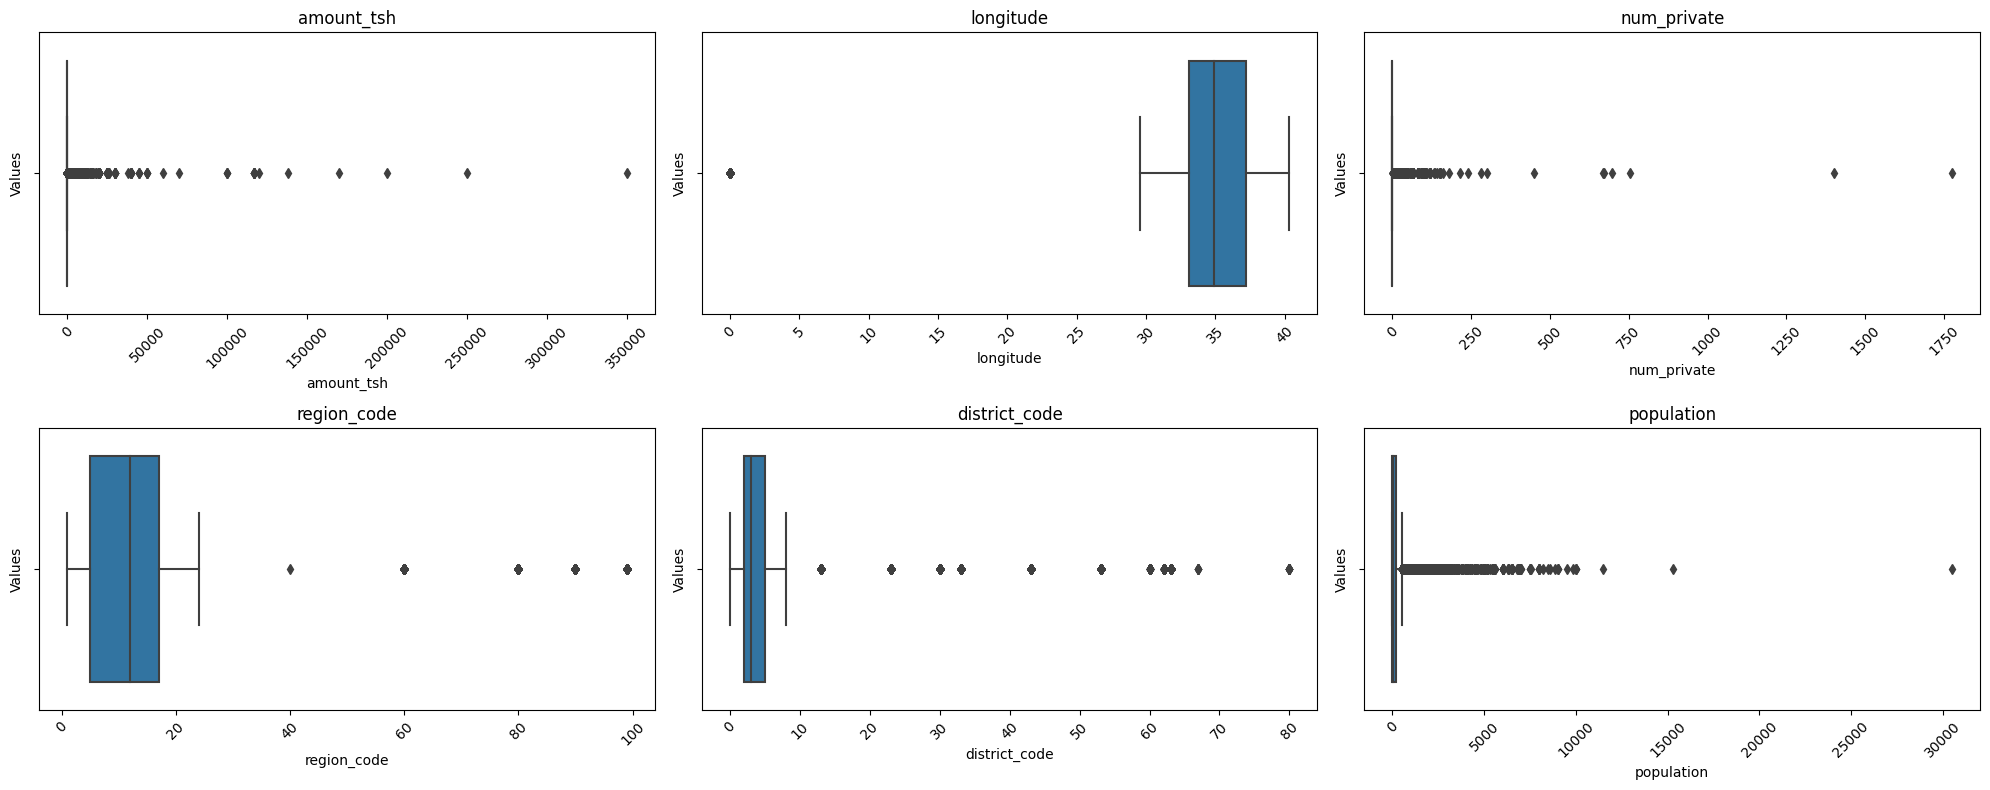

In [10]:
#Instantiate the Uniformity class
uniform = Uniformity(train_data)

# Separating the columns into numerical and categorical 
numerical_columns, categorical_columns=uniform.column_seperation()
print(f"Numerical Columns:",numerical_columns)

# Looking for Outliers in the numerical_columns
outlier_columns = uniform.detect_outliers_iqr()
print("Columns with outliers detected using IQR method:", outlier_columns)

# Plotting the columns with outliers
uniform.plot_outliers(outlier_columns)

**Observation:**
***
> - Region_code and District code are geographical code identifiers and shall be dropped since these codes regularly change and are not the current one based on their associated region columns [reference](https://www.iso.org/obp/ui/#iso:code:3166:TZ)
> - Num_private shall also be dropped as this column does not have accompanying data information.
> - Population and Amount-tsh (total static head) will not be dropped as they are valid points in the data
> - Longitude and Latitude will require further analysis

In [11]:
#Further analysis of the Longitude and Latitude Columns
# check to see if latitude outlier is the same for both regions
mwanza=train_data[train_data["region"]=="Mwanza"]["latitude"].max()
shinyanga=train_data[train_data["region"]=="Shinyanga"]["latitude"].max()
mwanza==shinyanga

True

In [12]:
# Reassigning it as maxim
maxim =mwanza

# Check the outlier value in maxim variable for longitude based on the region column
train_data[train_data["latitude"]==maxim]["region"].value_counts()

Shinyanga    1003
Mwanza        774
Name: region, dtype: int64

In [13]:
# Check the outlier value 0 for longitude based on the region column
train_data[train_data.longitude == 0]["region"].value_counts()

Shinyanga    1003
Mwanza        774
Name: region, dtype: int64

In [14]:
# Function to replace all outlier values with the median for the longitude column
def replace_zero_longitudes(df, longitude_col='longitude', latitude_col="latitude", region_col='region'):
    """
    Replace longitude and Latitude Outlier values with the median longitude of their respective regions.
    """
    regions = df[region_col].unique()
    median_longitudes = {}
    median_latitudes={}
    
    for region in regions:
        median_longitude = df[df[region_col] == region][longitude_col].median()
        median_latitude=df[df[region_col] == region][latitude_col].median()
        median_longitudes[region] = median_longitude
        median_latitudes[region] = median_latitude
        
        df.loc[(df[region_col] == region) & (df[longitude_col] == 0), longitude_col] = median_longitude
        df.loc[(df[region_col] == region) & (df[latitude_col] == maxim), latitude_col] = median_latitude

    
    return df, median_longitudes, median_latitudes

train_data, median_longitudes, median_latitudes = replace_zero_longitudes(train_data)
print("\nMedian Longitude values used:")
print("----------------------------")
print("Shinyanga:",median_longitudes["Shinyanga"])
print("Mwanza:   ",median_longitudes["Mwanza"])
print("\nMedian Latitude values used:")
print("----------------------------")
print("Shinyanga:",median_latitudes["Shinyanga"])
print("Mwanza:   ",median_latitudes["Mwanza"])
train_data



Median Longitude values used:
----------------------------
Shinyanga: 33.04787608
Mwanza:    32.99787276

Median Latitude values used:
----------------------------
Shinyanga: -3.3524871149999997
Mwanza:    -2.52297834


amount_tsh date_recorded             funder  gps_height     installer  \
9410          0.0    2012-11-13              Tasaf           0         TASAF   
18428         0.0    2011-03-05              Shipo        1978         SHIPO   
12119         0.0    2011-03-27               Lvia           0          LVIA   
10629        10.0    2013-06-03    Germany Republi        1639           CES   
2343          0.0    2011-03-22               Cmsr           0          CMSR   
...           ...           ...                ...         ...           ...   
15137         0.0    2013-03-22       World Vision        1183  World vision   
8667          0.0    2011-04-12             Danida           0        DANIDA   
22584         0.0    2012-11-13  Ministry Of Water        1188        Hesawa   
108          50.0    2011-03-07              Ruthe        1428         Ruthe   
39131        50.0    2013-02-16            Mission         965           DWE   

       longitude   latitude               wpt_name  num_private  \
9410   33.125828  -5.118154                Mratibu            0   
18428  34.770717  -9.395642                   none            0   
12119  36.115056  -6.279268                Bombani            0   
10629  37.147432  -3.187555         Area 7 Namba 5            0   
2343   36.164893  -6.099289                Ezeleda            0   
...          ...        ...                    ...          ...   
15137  37.007726  -3.280868  Upendo Primary School            0   
8667   33.724987  -8.940758            Kwa Mvulula            0   
22584  33.963539  -1.429477      Kwa Wambura Msege            0   
108    35.630481  -7.710549                   none            0   
39131  35.432998 -10.639270            Kwa Mapunda            0   

                         basin  ... payment_type water_quality  quality_group  \
9410           Lake Tanganyika  ...      unknown         milky          milky   
18428                   Rufiji  ...    never pay          soft           good   
12119              Wami / Ruvu  ...   per bucket          soft           good   
10629                  Pangani  ...   per bucket          soft           good   
2343               Wami / Ruvu  ...      unknown          soft           good   
...                        ...  ...          ...           ...            ...   
15137                  Pangani  ...      unknown          soft           good   
8667                    Rufiji  ...   on failure          soft           good   
22584            Lake Victoria  ...    never pay          soft           good   
108                     Rufiji  ...   per bucket          soft           good   
39131  Ruvuma / Southern Coast  ...   per bucket          soft           good   

           quantity                source           source_type  source_class  \
9410         enough          shallow well          shallow well   groundwater   
18428        enough          shallow well          shallow well   groundwater   
12119  insufficient           machine dbh              borehole   groundwater   
10629        enough                spring                spring   groundwater   
2343            dry          shallow well          shallow well   groundwater   
...             ...                   ...                   ...           ...   
15137  insufficient  rainwater harvesting  rainwater harvesting       surface   
8667         enough                 river            river/lake       surface   
22584        enough                  lake            river/lake       surface   
108             dry                spring                spring   groundwater   
39131           dry                 river            river/lake       surface   

                   waterpoint_type waterpoint_type_group    status_group  
9410                     hand pump             hand pump  non functional  
18428                    hand pump             hand pump      functional  
12119  communal standpipe multiple    communal standpipe      function

**Observations:**
***
> - It was evident that the longitude and latitude columns for Mwanza and Shinyanga had been given incorrect values i.e. outlier positions.
> - The longitudes and latitudes have been replaced by the median of the regions and is a suitable replacement and can be confirmed from [TZ_Cities_db](https://simplemaps.com/data/tz-cities)
> - Median was used as it is least affected by the outlier values. It would also give the most probable accurate value
> - Dataset has 59,364 rows and 38 columns

In [15]:
# Convert the list datatype to bool and return info on the data
list_to_bool=["permit", "public_meeting"]
uniform.convert_column_dtype(list_to_bool, bool).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 9410 to 39131
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59364 non-null  float64
 1   date_recorded          59364 non-null  object 
 2   funder                 55729 non-null  object 
 3   gps_height             59364 non-null  int64  
 4   installer              55709 non-null  object 
 5   longitude              59364 non-null  float64
 6   latitude               59364 non-null  float64
 7   wpt_name               59364 non-null  object 
 8   num_private            59364 non-null  int64  
 9   basin                  59364 non-null  object 
 10  subvillage             58993 non-null  object 
 11  region                 59364 non-null  object 
 12  region_code            59364 non-null  int64  
 13  district_code          59364 non-null  int64  
 14  lga                    59364 non-null  object 
 15 

**Observation:**
***
> - Permit and public meeting have now been accurately classified as boolean types
> - All other datatypes shall be used as is
> - Dataset has 59,364 rows and 38 columns

***
**COMPLETENESS CHECK**
***
> - Check for similarity in columns
> - Check for Null values in all rows

In [16]:
class Completeness:
    def __init__(self,df):  
        self.df=df        
        
    def similarity(self,threshold=0.2):
        """
        Identifying columns that have similarity in their value counts 
        with a low threshold to avoid missing similarities
        """
        similar_columns = []

        # Calculate the similarity between each pair of columns
        for col1, col2 in combinations(self.df.columns, 2):
            set1, set2 = set(self.df[col1]), set(self.df[col2])
            intersection = len(set1 & set2)
            union = len(set1 | set2)
            similarity = intersection / union if union != 0 else 0

        # Check if similarity exceeds threshold
            if similarity > threshold:
                similar_columns.append((col1, col2))

        return similar_columns
    
    def similar_columns(self,similar_columns):
        """
        Visually representing these similar columns for inspection
        """
        for col1, col2 in similar_columns:
            print(f"Value counts for columns '{col1}' and '{col2}':")
            print("\nColumn '{}' value counts:".format(col1))
            print(self.df[col1].value_counts())
            print("\nColumn '{}' value counts:".format(col2))
            print(self.df[col2].value_counts())
            print("\n")    
            
    def null_values(self):
        """
        Identify Null values in dataset as value count and percentage 
        """
        # Get features with null values
        null_features = self.df.columns[self.df.isnull().any()].tolist()
        
        # Calculate the number of missing values for each feature
        null_counts = self.df[null_features].isnull().sum()
        
        # Calculate the percentage of missing data for each feature
        null_percentages = self.df[null_features].isnull().mean() * 100
        
        # Create a DataFrame to display the results
        null_info = pd.DataFrame({
                                'Column Names': null_features,
                                'Missing Values': null_counts,
                                'Percentage Missing': null_percentages
        }).reset_index(drop=True)

        return null_info
    
    def handle_missing_values(self):
        """
        Handle missing values in the DataFrame.
        """
        null_info = self.null_values()
        
        # Apply conditions for handling missing values
        for index, row in null_info.iterrows():
            if row['Percentage Missing'] < 5:
                # Drop rows with missing values
                self.df.dropna(subset=[row['Column Names']], inplace= True)
            elif 5 <= row['Percentage Missing'] <= 10:
                # Replace missing values with "Unknown"
                self.df[row['Column Names']].fillna("Unknown", inplace=True)
            else:
                # More than 10% missing, mark column for dropping
                print(f"Column '{row['Column Names']}' has more than 10% missing values.")
                        
        return self.df  
            

In [17]:
# Checking for completeness in the dataset

# Instantiate the Completeness check class
comp= Completeness(train_data)

# Find columns that have similar distinct elements using a small threshold of 0.2
similar_columns=comp.similarity(threshold=0.2)
display(similar_columns)

# Visualling comparing similar columns
comp.similar_columns(similar_columns)

[('gps_height', 'population'),
 ('num_private', 'region_code'),
 ('region_code', 'district_code'),
 ('public_meeting', 'permit'),
 ('extraction_type', 'extraction_type_group'),
 ('extraction_type_group', 'extraction_type_class'),
 ('management', 'management_group'),
 ('payment', 'payment_type'),
 ('water_quality', 'quality_group'),
 ('source', 'source_type'),
 ('waterpoint_type', 'waterpoint_type_group')]

Value counts for columns 'gps_height' and 'population':

Column 'gps_height' value counts:
 0       20402
-15         60
-13         55
-16         55
 1290       52
         ...  
 2536        1
 2405        1
 2312        1
 2391        1
 2281        1
Name: gps_height, Length: 2428, dtype: int64

Column 'population' value counts:
0       21345
1        7025
200      1940
150      1892
250      1681
        ...  
1032        1
663         1
1893        1
2129        1
1523        1
Name: population, Length: 1049, dtype: int64


Value counts for columns 'num_private' and 'region_code':

Column 'num_private' value counts:
0      58607
6         81
1         73
8         46
5         46
       ...  
755        1
672        1
698        1
23         1
94         1
Name: num_private, Length: 65, dtype: int64

Column 'region_code' value counts:
11    5300
17    4989
12    4639
3     4379
5     4040
18    3323
19    3034
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14 

**Observations:**
***
  - After visually inspecting the column pairs, some columns bare similarity (i.e. a column is a subset of another column) to each other and were dropped to avoid repeated data points.
  - The columns are:
>                  'waterpoint_type_group', 'source','water_quality', 'payment', 
>                  'management', 'extraction_type_group', 'extraction_type'


In [18]:
# Inspecting for null values
comp.null_values()

Column Names  Missing Values  Percentage Missing
0             funder            3635            6.123240
1          installer            3655            6.156930
2         subvillage             371            0.624958
3  scheme_management            3877            6.530894
4        scheme_name           28139           47.400782

In [19]:
# Handling with null values 
comp.handle_missing_values()

Column 'scheme_name' has more than 10% missing values.


amount_tsh date_recorded             funder  gps_height     installer  \
9410          0.0    2012-11-13              Tasaf           0         TASAF   
18428         0.0    2011-03-05              Shipo        1978         SHIPO   
12119         0.0    2011-03-27               Lvia           0          LVIA   
10629        10.0    2013-06-03    Germany Republi        1639           CES   
2343          0.0    2011-03-22               Cmsr           0          CMSR   
...           ...           ...                ...         ...           ...   
15137         0.0    2013-03-22       World Vision        1183  World vision   
8667          0.0    2011-04-12             Danida           0        DANIDA   
22584         0.0    2012-11-13  Ministry Of Water        1188        Hesawa   
108          50.0    2011-03-07              Ruthe        1428         Ruthe   
39131        50.0    2013-02-16            Mission         965           DWE   

       longitude   latitude               wpt_name  num_private  \
9410   33.125828  -5.118154                Mratibu            0   
18428  34.770717  -9.395642                   none            0   
12119  36.115056  -6.279268                Bombani            0   
10629  37.147432  -3.187555         Area 7 Namba 5            0   
2343   36.164893  -6.099289                Ezeleda            0   
...          ...        ...                    ...          ...   
15137  37.007726  -3.280868  Upendo Primary School            0   
8667   33.724987  -8.940758            Kwa Mvulula            0   
22584  33.963539  -1.429477      Kwa Wambura Msege            0   
108    35.630481  -7.710549                   none            0   
39131  35.432998 -10.639270            Kwa Mapunda            0   

                         basin  ... payment_type water_quality  quality_group  \
9410           Lake Tanganyika  ...      unknown         milky          milky   
18428                   Rufiji  ...    never pay          soft           good   
12119              Wami / Ruvu  ...   per bucket          soft           good   
10629                  Pangani  ...   per bucket          soft           good   
2343               Wami / Ruvu  ...      unknown          soft           good   
...                        ...  ...          ...           ...            ...   
15137                  Pangani  ...      unknown          soft           good   
8667                    Rufiji  ...   on failure          soft           good   
22584            Lake Victoria  ...    never pay          soft           good   
108                     Rufiji  ...   per bucket          soft           good   
39131  Ruvuma / Southern Coast  ...   per bucket          soft           good   

           quantity                source           source_type  source_class  \
9410         enough          shallow well          shallow well   groundwater   
18428        enough          shallow well          shallow well   groundwater   
12119  insufficient           machine dbh              borehole   groundwater   
10629        enough                spring                spring   groundwater   
2343            dry          shallow well          shallow well   groundwater   
...             ...                   ...                   ...           ...   
15137  insufficient  rainwater harvesting  rainwater harvesting       surface   
8667         enough                 river            river/lake       surface   
22584        enough                  lake            river/lake       surface   
108             dry                spring                spring   groundwater   
39131           dry                 river            river/lake       surface   

                   waterpoint_type waterpoint_type_group    status_group  
9410                     hand pump             hand pump  non functional  
18428                    hand pump             hand pump      functional  
12119  communal standpipe multiple    communal standpipe      function

**Observation:**
***
- The null values have been handled according to their percentage of missing values
> - Less than 5% values have had those rows dropped i.e. subvillage column(371 rows)
> - Between 5-10% have had their Nan Values replaced by Unknown i.e. scheme_management,funder and installer columns
> - Greater than 10% will be added to a features drop list to be dropped i,e, scheme_name column

In [20]:
# After visual inspection, generating list of similar columns to drop
features_to_drop=['waterpoint_type', 'source','water_quality', 'payment', 
                  'management', 'extraction_type_group', 'extraction_type',
                  'scheme_name',"region_code","district_code","num_private",
                 ]

# recalling drop duplicates from the consistency class
clean_data=const.drop_duplicate_columns(features_to_drop)

(58993, 27)

**Observation:**
*** 
- The dataset now has 58,993 columns and 27 rows
- The dataset still has columns with very high cardinality. This shall be taken care of before modelling as they are still important for bivariate analysis

***
## EXPLORATORY DATA ANALYSIS
***
In this section consideration was given to:
> - Feature Engineering
> - Univariate Analysis
> - Bivariate Analysis
> - Handling High Cardinality Columns

***
### FEATURE ENGINEERING
***
Before continuining with the EDA process, the following needs to be engineered
>  - Target variable shall be converted to a binary classification problem.
>  - Age of the water points is of vital importance and so feature engineering shall also be carried out to ascertain the age of these points and only those with a viable age were used


In [23]:
# Define the names to be changed and their new values
name_changes = {
    "functional needs repair": 'functional',
}

# Replace the names in the status_group column
clean_data['status_group'] = clean_data['status_group'].replace(name_changes)
clean_data.status_group.value_counts()

functional        36345
non functional    22648
Name: status_group, dtype: int64

In [24]:
# Function to calculate the age of the water points
def calculate_age(df, date_col='date_recorded', year_col='construction_year', new_col='age'):
    """
    Processes the date column to extract the year and calculates the age based on the construction year.
    """
    # Extract the year from the date column and replace the column with the year
    df[date_col] = pd.to_datetime(df[date_col]).dt.year
    
    # Calculate the age and create a new column
    df[new_col] = df[date_col]-df[year_col] 
    
    return df

# Process the DataFrame and calculate age
clean_data = calculate_age(clean_data)

#Filter the dataset to only have data with relevant age
aged_data = clean_data[(clean_data["age"] >= 0) & (clean_data["age"] <= 100)]
print(f"Shape of the cleaned_data:",clean_data.shape)
print(f"Shape of the aged_data:",aged_data.shape)

Shape of the cleaned_data: (58993, 28)
Shape of the aged_data: (38672, 28)


In [25]:
deleted_data = clean_data[ (clean_data["age"] >= 100)]
deleted_data["region"].value_counts()

Shinyanga        4816
Mbeya            4639
Kagera           3315
Mwanza           2714
Tabora           1959
Dodoma           1840
Iringa            372
Pwani             176
Lindi             113
Tanga              94
Mtwara             87
Arusha             51
Kilimanjaro        35
Morogoro           18
Dar es Salaam      17
Mara               17
Ruvuma             16
Manyara            13
Kigoma             10
Singida             8
Rukwa               2
Name: region, dtype: int64

In [26]:
#Folium Map for all datapoints

In [27]:
# Folium map for datapoints with relevant age


**Observations:**
***
> - The dataset target variable now has 2 distinct elements.
> - Being a vital predictor, age is missing several rows of construction year data and this reduced the size of the dataset to 38,672 rows and 28 columns
<div class="alert alert-block alert-info">
<b>NOTE:</b> As evident from the counts, the missing construction years are mainly found in the following areas i.e. 
Shinyanga(4816), Mbeya(4639), Kagera(3315), Mwanza(2714), Tabora(1959), Dodoma(1840), Iringa(372), Pwani(176) and Lindi(113).
with other all other areas missing less than 100 entries each. Analysis carried out with dataset with available age only.
</div>

***
#### UNIVARIATE ANALYSIS
***
For this analysis we were interested in the following 
> - Target Variable Distribution to determine class imbalance
> - Age and population distribution of the dataset
> - Feature distribution of the following columns of interest

In [28]:
# Get the value counts of the 'status_group' column
value_counts = aged_data['status_group'].value_counts()

# Create an interactive pie chart
fig = px.pie(
            value_counts,
            values=value_counts.values,
            names=value_counts.index,
#             color_discrete_sequence=["cyan","pink","yellow"],
            title='Distribution of Status Group',
            hole=0.3
            )

display(value_counts)
fig.show()

functional        24225
non functional    14447
Name: status_group, dtype: int64

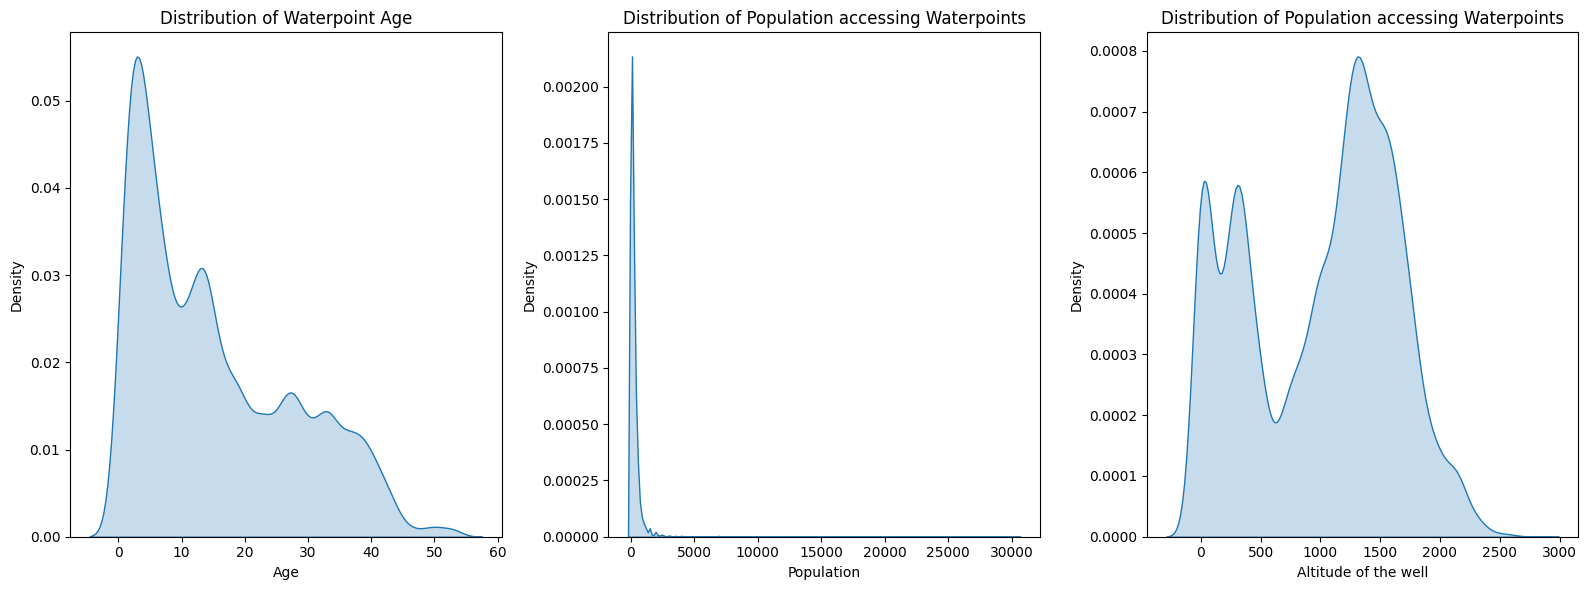

In [35]:
# Create subplots with 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16, 6), ncols=3)

# Plot the density of age on the first subplot
sns.kdeplot(aged_data['age'], shade=True, ax=ax1)
ax1.set_title('Distribution of Waterpoint Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')

# Plot the density of population on the second subplot
sns.kdeplot(aged_data['population'], shade=True, ax=ax2)
ax2.set_title('Distribution of Population accessing Waterpoints')
ax2.set_xlabel('Population')
ax2.set_ylabel('Density')

# Plot the density of Altitude of the Well on the second subplot
sns.kdeplot(aged_data['gps_height'], shade=True, ax=ax3)
ax3.set_title('Distribution of Population accessing Waterpoints')
ax3.set_xlabel('Altitude of the well')
ax3.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
def plot_countplots(df, columns):
    """
    """
    fig, axes = plt.subplots(4,3, figsize=(20, 18))  
    
    for i in range(len(columns)):
        row = i // 3
        col = i % 3
        ax = axes[row, col] 
        sorted_counts = df[columns[i]].value_counts().sort_values(ascending=False)
        sns.countplot(data=df, y=columns[i], order=sorted_counts.index, ax=ax)
        ax.set_title(f'Frequency of {columns[i]}', fontsize=16)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=10)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=14) 
        ax.set_ylabel(columns[i], fontsize=14)
    plt.tight_layout()
    plt.show()

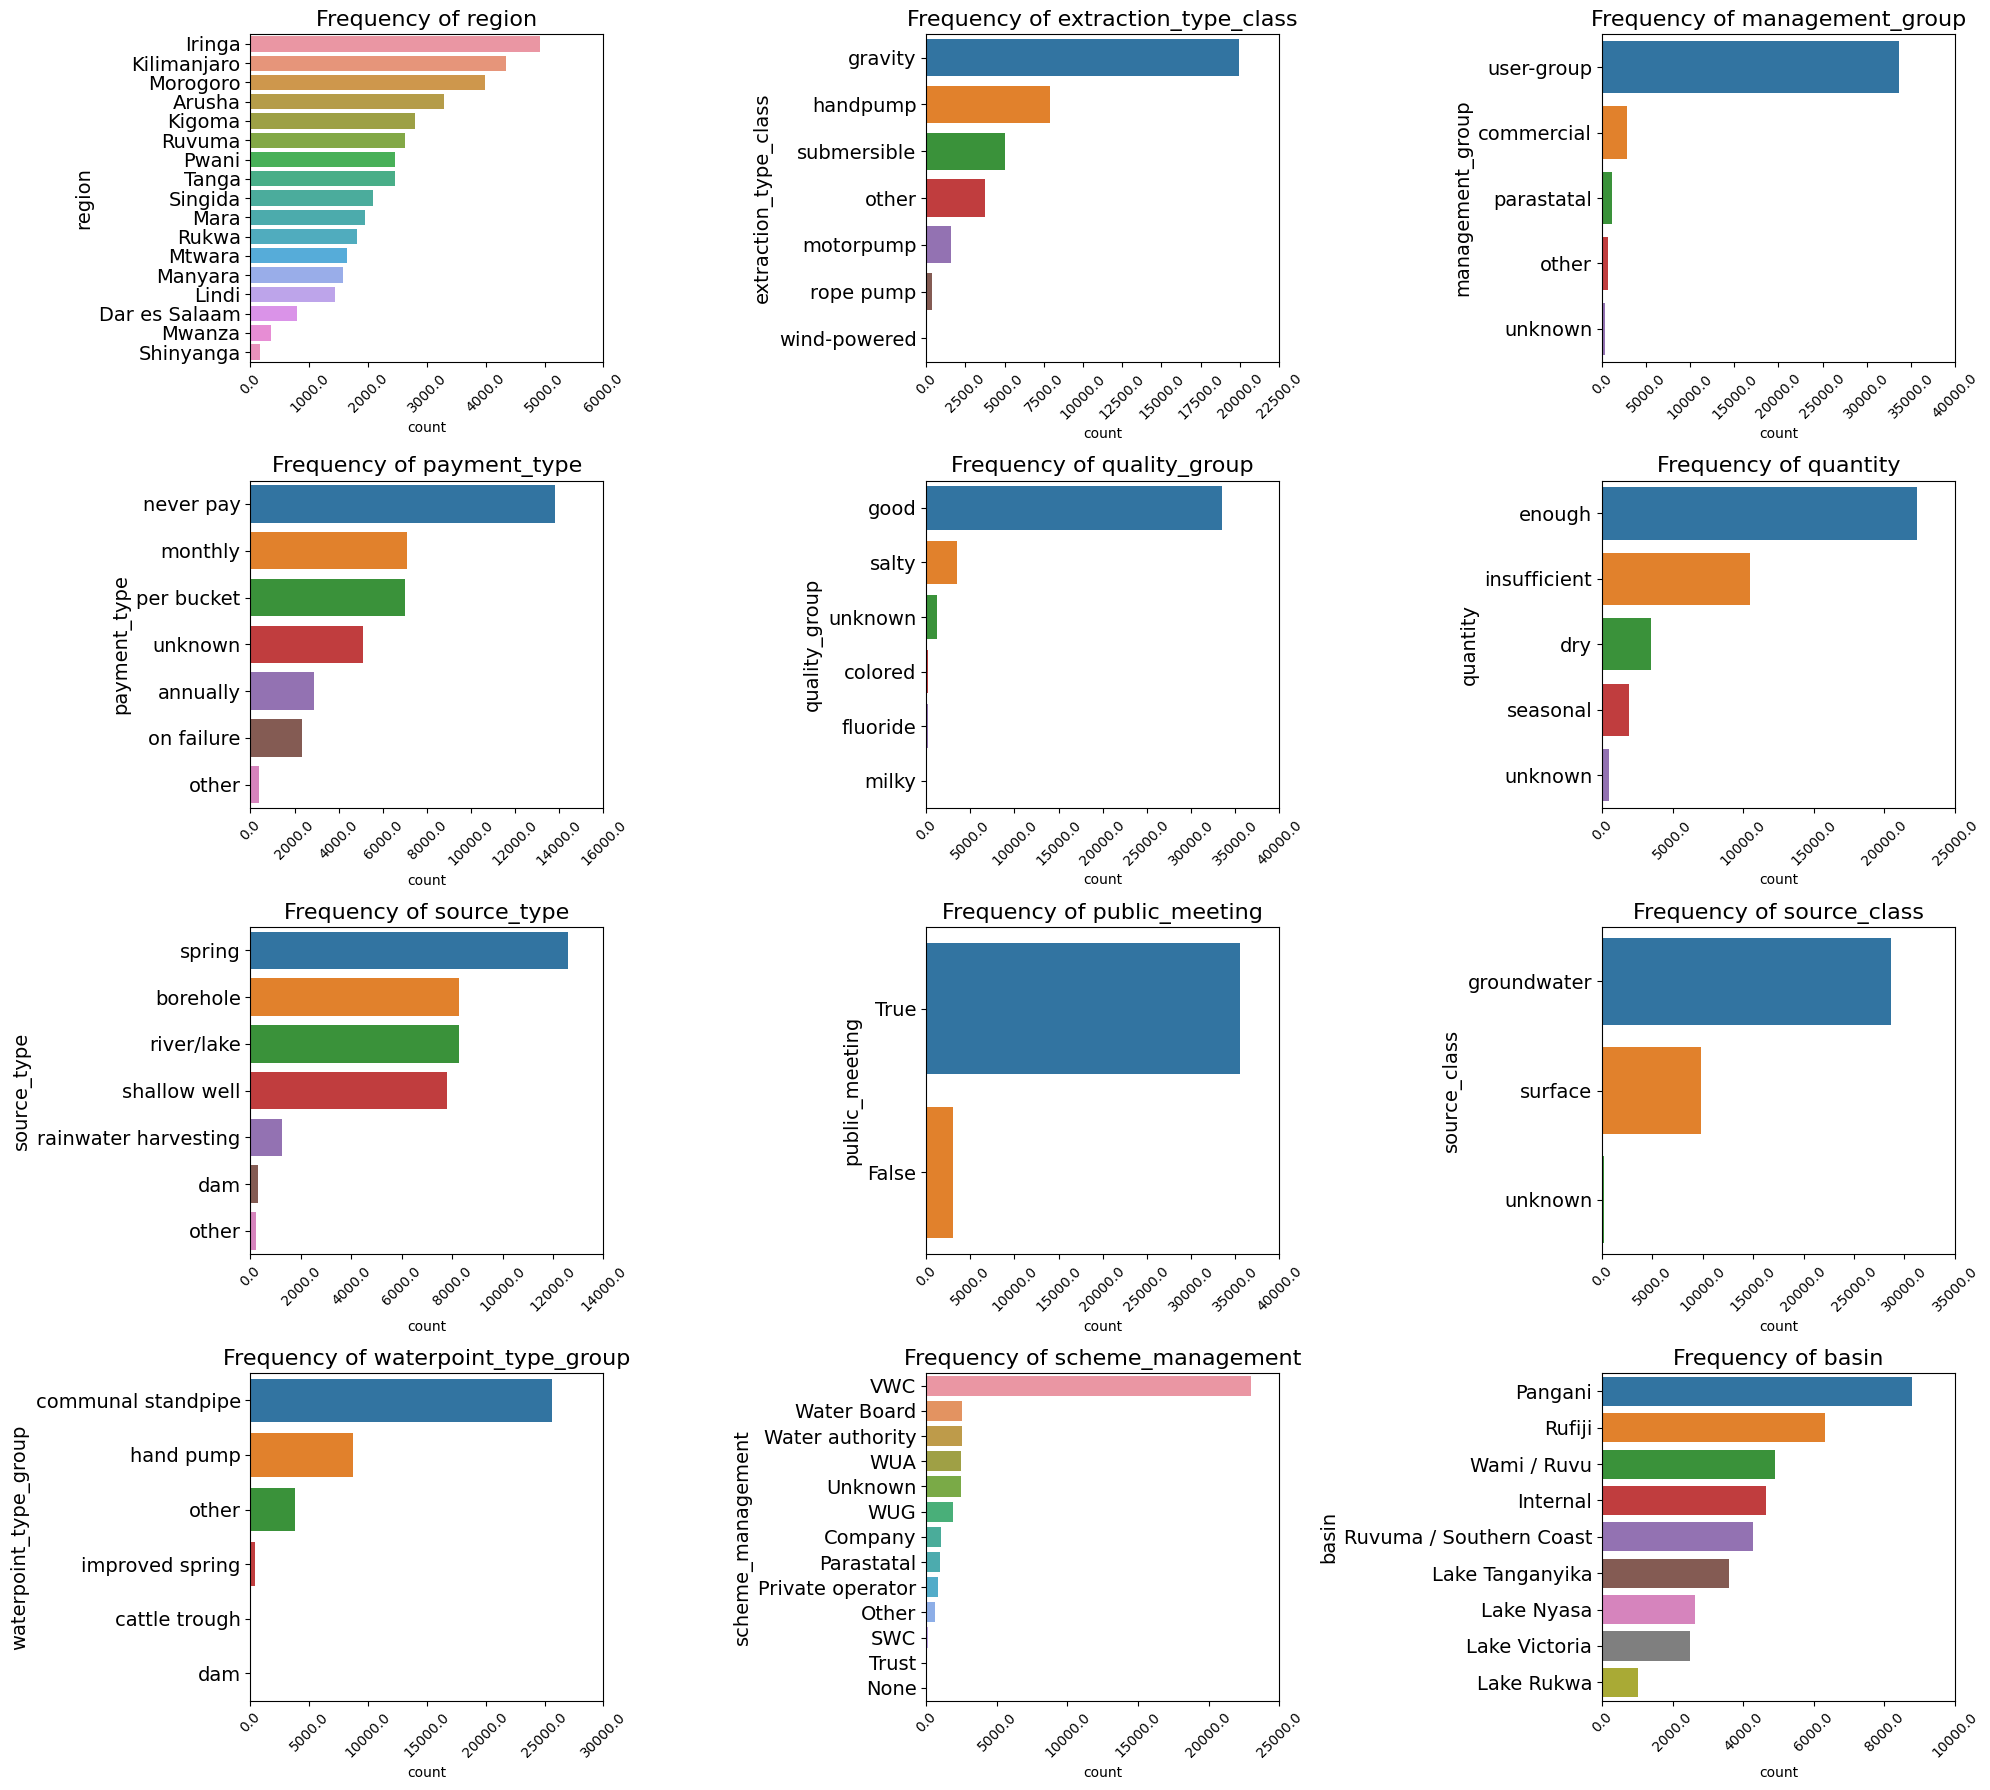

In [37]:
columns= ['region','extraction_type_class',
          'management_group', 'payment_type', 
          'quality_group', 'quantity','source_type','public_meeting', 
          'source_class', 'waterpoint_type_group','scheme_management','basin' ]

plot_countplots(aged_data, columns, )

**Observations:**
***
> - Our status group show 62.6% functional and 37.4% non functional water points. There is some slight class imbalance 
> - Most of the water points have been set up in the past 15-20 years showing commitment by the Tanzanian government to their MDG goals
> - The water points on average seem to service less than 2000 people.
> - From the feature columns considered we can see that
>  1. The source class is primarily ground water with the source type being springs
>  2. The extraction type is mainly gravity with communal standpipes being the main technology in use
>  3. The quantity of water is majorly enough with the most common quality type being good 
>  4. The majority management type is user groups and scheme management is mainly by village water committees
>  5. The water points are mainly located in public meeting areas with most of the population never paying for the service
>  5. The 5 regions with the most water points are Iringa, Kilimanjaro, Morogoro, Arusha and Kigoma 

***
### BIVARIATE ANALYSIS
***
In this section we will consider the relationship between:
> - Age and well altitude and the target variable
> - Funder and Installer fetures against the target variable
> - Select Features and the target variables


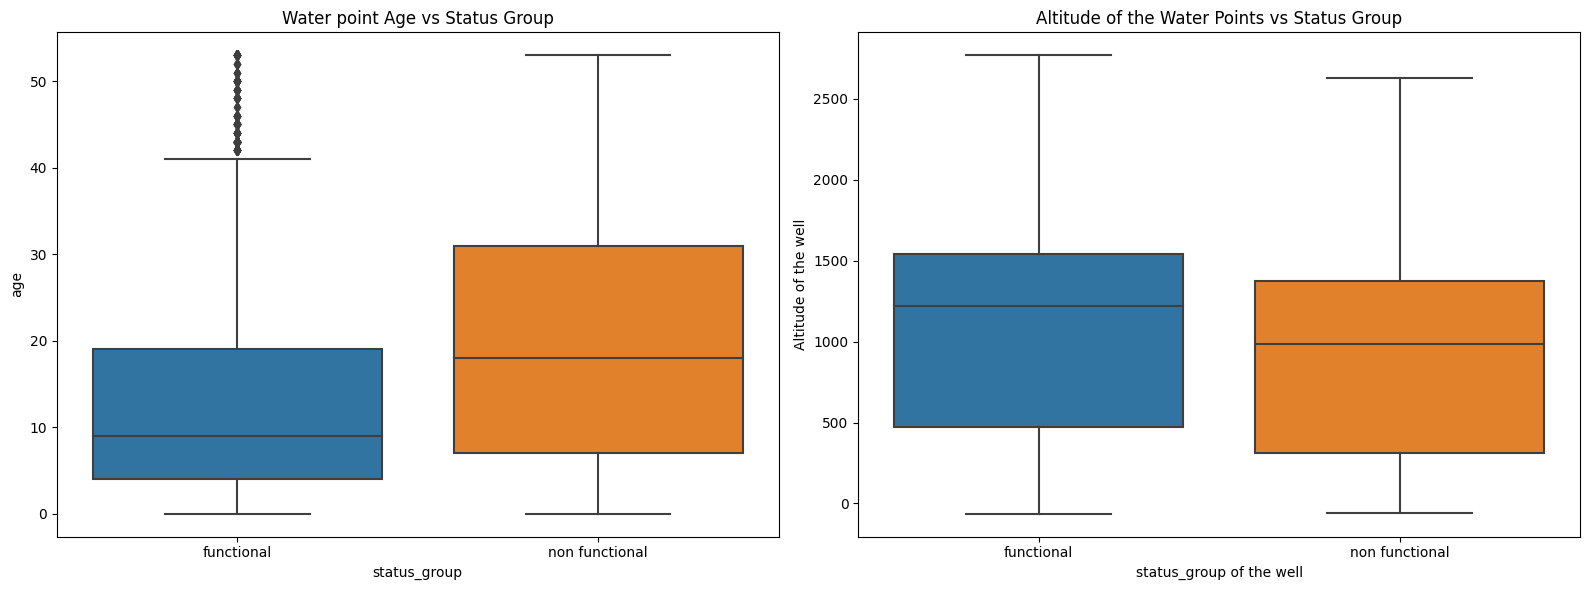

In [80]:
# Create subplots with 3 columns
fig, (ax1, ax2) = plt.subplots(figsize=(16, 6), ncols=2)

# Plot the density of age 
sns.boxplot(x='status_group', y='age', data=aged_data,  ax=ax1)
ax1.set_title('Water point Age vs Status Group')
ax1.set_xlabel('status_group')
ax1.set_ylabel('age')

# Plot the density of Altitude of the Well
sns.boxplot(x='status_group', y='gps_height', data=aged_data,  ax=ax2)
ax2.set_title('Altitude of the Water Points vs Status Group')
ax2.set_xlabel('status_group of the well')
ax2.set_ylabel('Altitude of the well')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


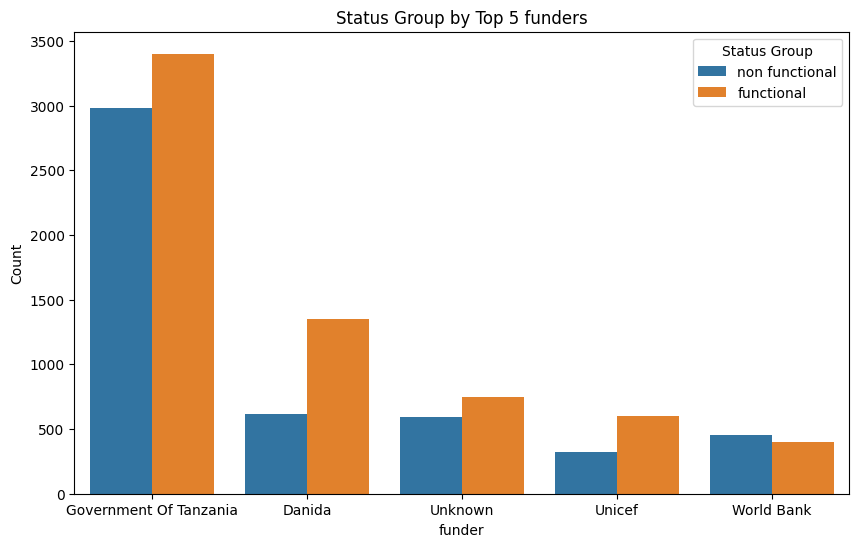

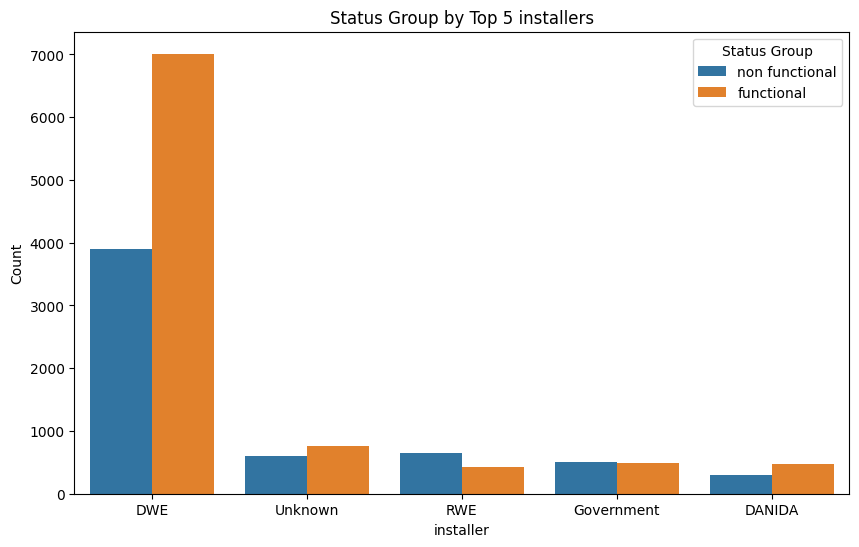

In [81]:
def plot_count_plots(df, columns):
    """
    Plot count plots for the top five values of each column while keeping hue as "status_group".
    """    
    for column in columns:
        # Get the top n values of the column in descending order
        top_values = df[column].value_counts().head().index
        
        # Filter the DataFrame to include only the top n values
        df_top_values = df[df[column].isin(top_values)]
        
        # Create the count plot for the top n values of the column
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_top_values, x=column, hue="status_group", order=top_values)
        plt.title(f"Status Group by Top 5 {column}s")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks()
        plt.legend(title="Status Group")
        plt.show()
plot_count_plots(aged_data, columns=["funder", "installer"])

In [111]:
def plot_count_plots(df, columns, ):
    """
    Plot count plots for each column in the list while keeping hue as "status_group".
    """
    num_rows=6
    num_cols=2
        
    fig, axes = plt.subplots(num_rows,num_cols, figsize=(15, 30))
    for i in range(len(columns)):
        row = i // 2
        col = i % 2
        ax = axes[row, col] 
        sorted_counts = df[columns[i]].value_counts().sort_values(ascending=False)
        sns.countplot(data=df, y=columns[i], order=sorted_counts.index, ax=ax, hue="status_group", )
        ax.set_title(f'Status group of {columns[i]}', fontsize=16)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=10)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=14) 
        ax.set_ylabel(columns[i], fontsize=14)
        ax.legend(loc='lower right') 
    
    # removing extra empty axis
    for i in range(len(columns), 6 * 2): 
        axes.flatten()[i].remove()
      
    plt.tight_layout()
    plt.show()

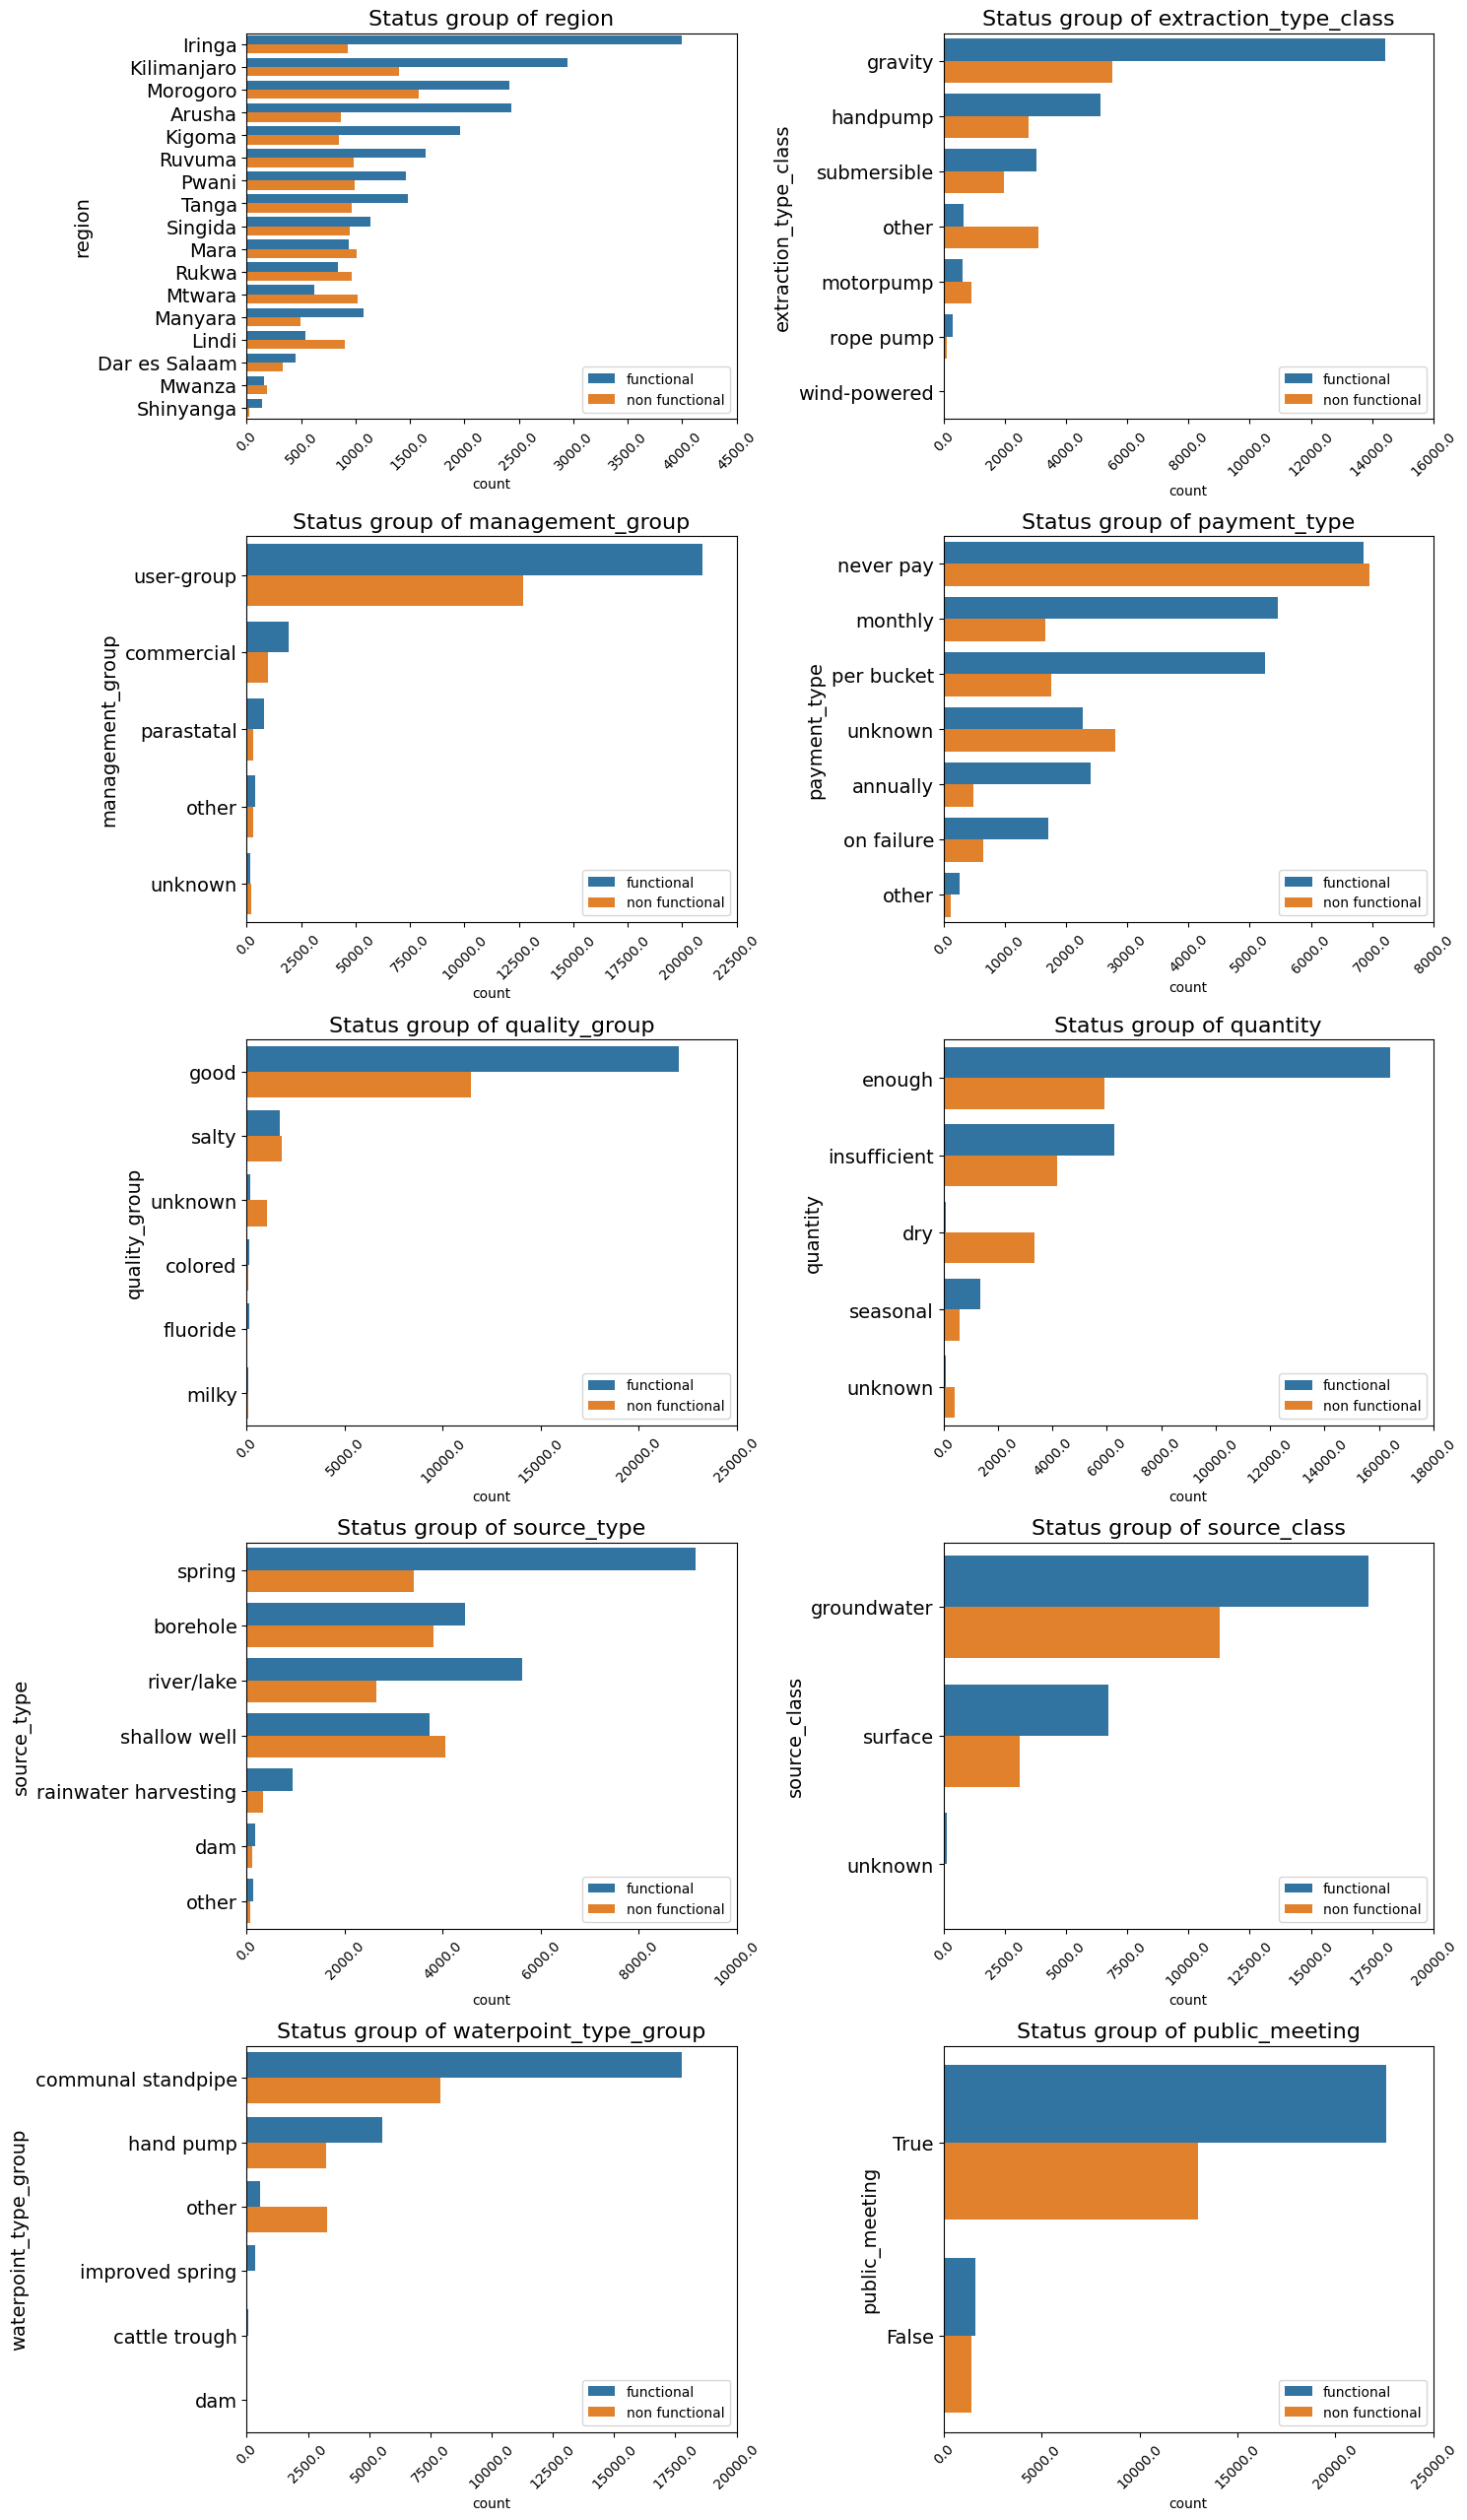

In [134]:
# Columns to be plotted
cols= ['region','extraction_type_class',
        'management_group', 'payment_type', 
        'quality_group', 'quantity','source_type', 
        'source_class', 'waterpoint_type_group',"public_meeting"]
plot_count_plots(aged_data, columns=cols )

**Observations**
***
>- We can see that the lifespan of these pumps is roughly 18-20 years with some fairly new pumps failing within the first 10 years
>- Waterpoints at a higher altitude generally seem to be fail less as compared to those in lower altitudes
>- The local government is the greatest funder of these water points with the distric water engineeer mainly incharge of installing them with most of these waterpoints still in operation
>- Key observations from the features are:
    1. Water points where people never pay, have more none functional water points.
    2. Areas with salty water are prone to have more none functional water points
    3. Shallow well source types also seem to have more none functional water points.
    4. Areas with quantity classification as dry have primarily none functional water points.
    5. Motor Pumps equipment are more likely to have none functional water points.
    6. The areas of Mara, Rukwa, Mtwara, Lindi and Mwanza have more none functional waterpoints.

***
**MEAN AGE OF WATER POINTS BY REGION**
***

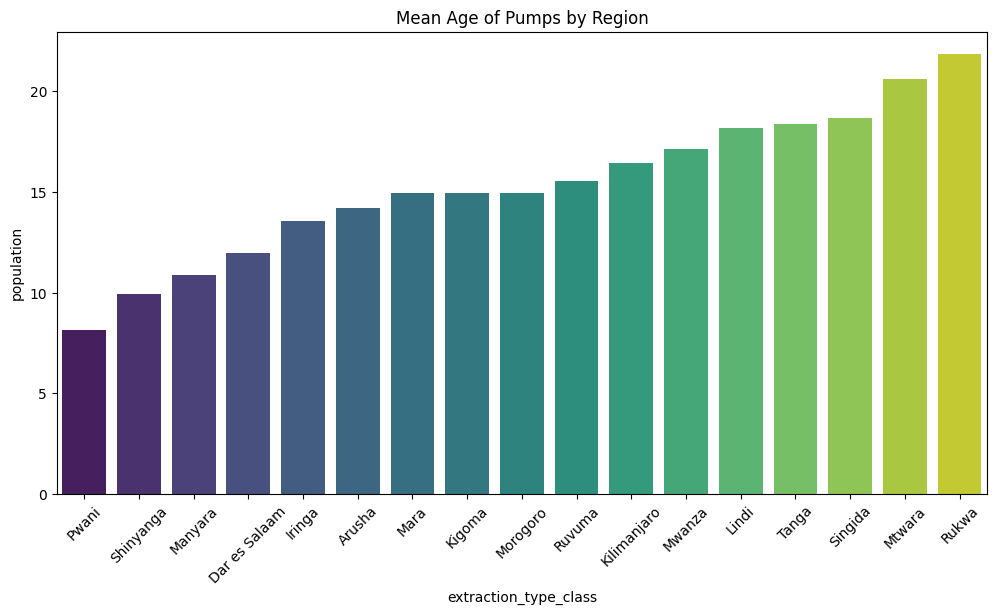

In [124]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby('region')["age"].mean().sort_values(ascending=True)

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='age', data=sorted_data_df, palette='viridis')
plt.title('Mean Age of WaterPoints by Region')
plt.xlabel('extraction_type_class')
plt.ylabel('population')
plt.xticks(rotation=45)
plt.show()

***
**EFFECT OF AGE ON TECHNOLOGY USED**
***

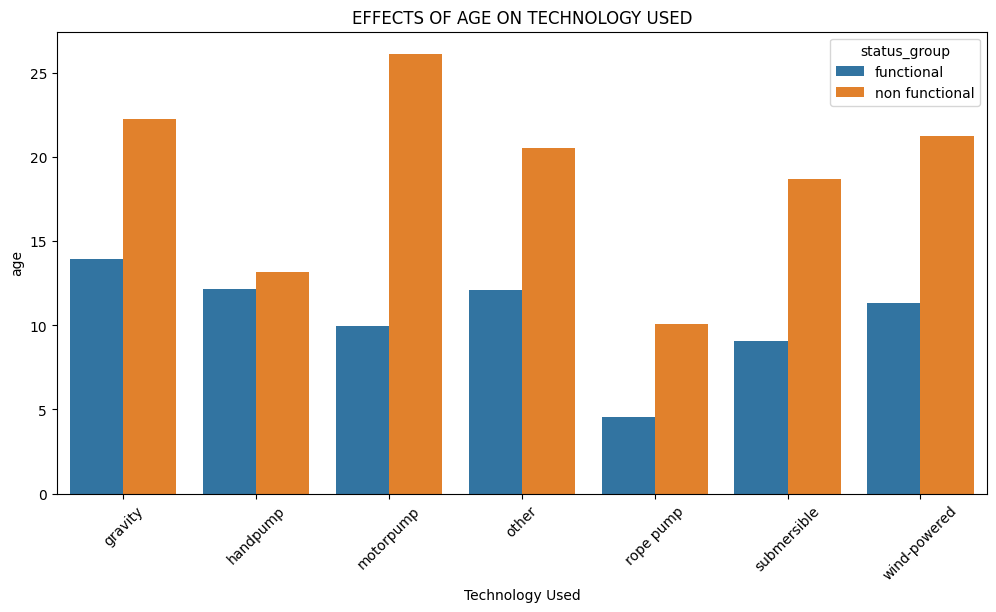

In [138]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby(['extraction_type_class', 'status_group'])['age'].mean().reset_index()
sorted_data

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='extraction_type_class', y='age', data=sorted_data_df, hue="status_group")
plt.title('EFFECTS OF AGE ON TECHNOLOGY USED')
plt.xlabel('Technology Used')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.show()

***
**EFFECT OF WELL ALTITUDE ON EQUIPMENT FAILURE**
***

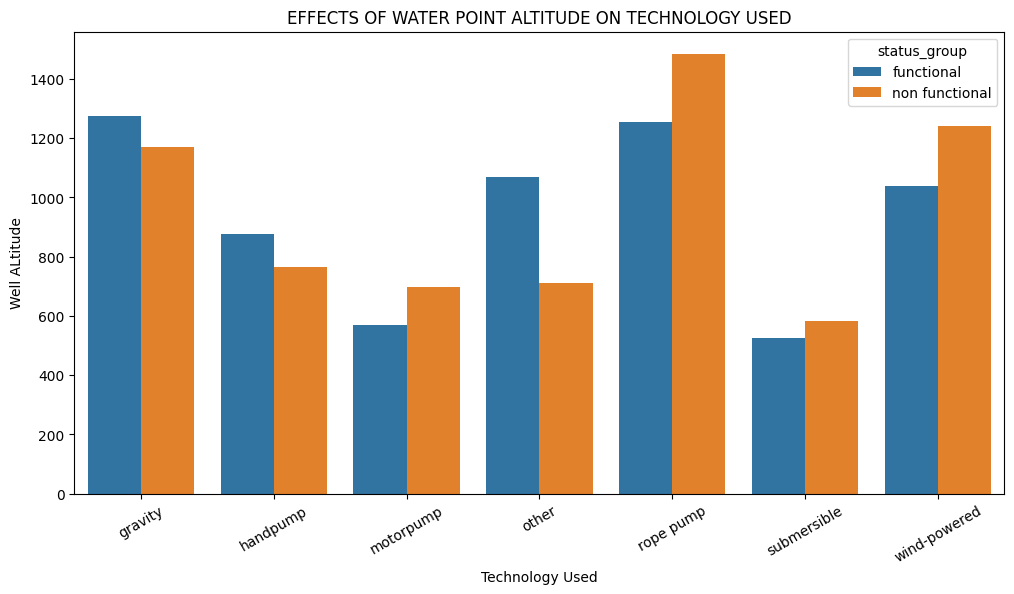

In [114]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby(['extraction_type_class', 'status_group'])['gps_height'].mean().reset_index()
sorted_data

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='extraction_type_class', y='gps_height', data=sorted_data_df, hue="status_group")
plt.title('EFFECTS OF WATER POINT ALTITUDE ON TECHNOLOGY USED')
plt.xlabel('Technology Used')
plt.ylabel('Well ALtitude')
plt.xticks(rotation=30)
plt.show()

***
**EFFECT OF POPULATION ON EQUIPMENT FAILURE**
***

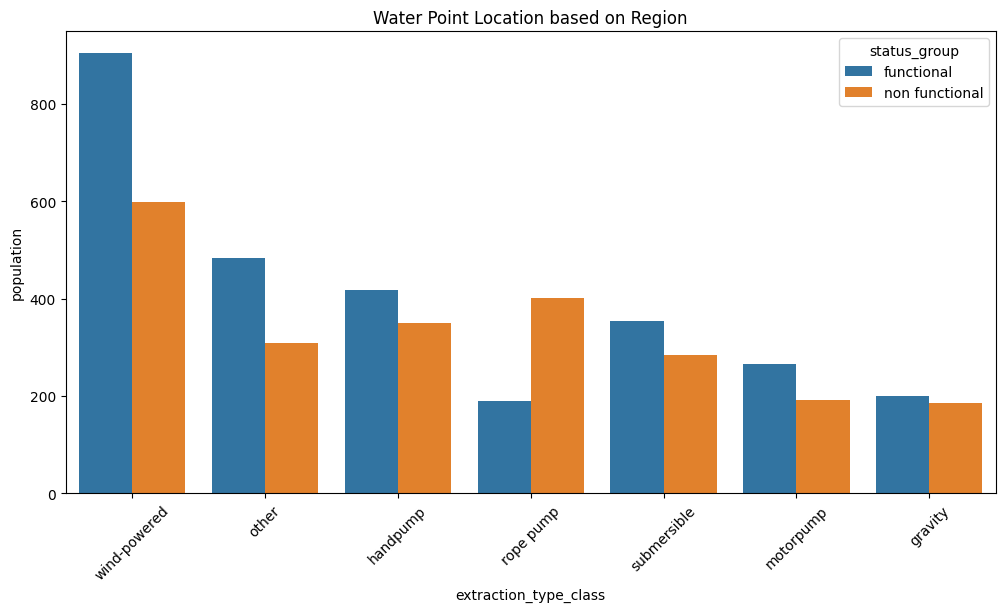

In [137]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby(['extraction_type_class', 'status_group'])['population'].mean().sort_values(ascending= False)
sorted_data

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='extraction_type_class', y='population', data=sorted_data_df, hue="status_group")
plt.title('Water Point Location based on Region')
plt.xlabel('extraction_type_class')
plt.ylabel('population')
plt.xticks(rotation=45)
plt.show()

In [77]:
aged_data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'source_class', 'waterpoint_type_group', 'status_group',
       'age'],
      dtype='object')

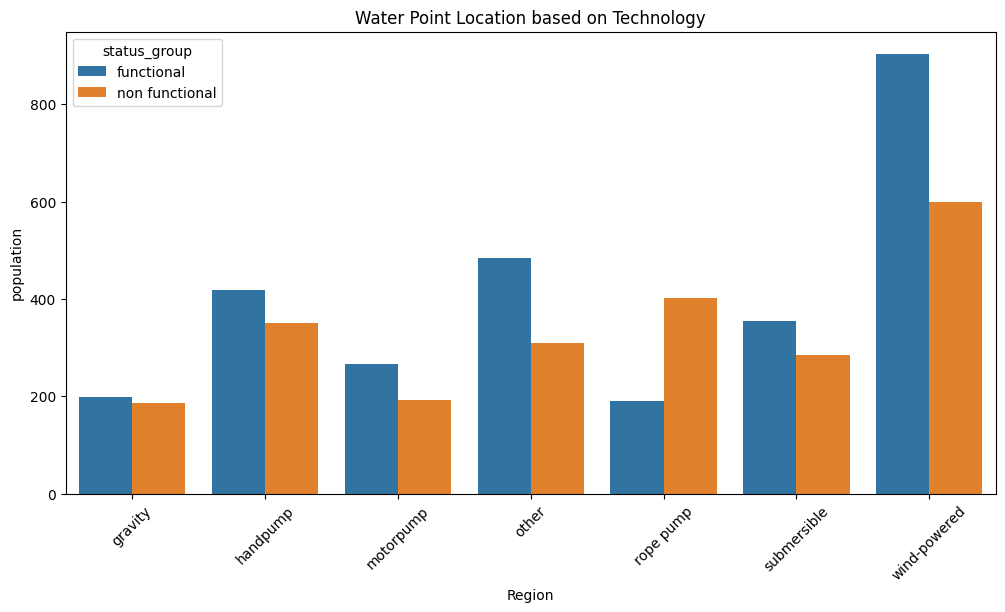

In [89]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby(['extraction_type_class', 'status_group'])['population'].mean().reset_index()
sorted_data

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='extraction_type_class', y='population', data=sorted_data_df, hue="status_group")
plt.title('Water Point Location based on Technology')
plt.xlabel('Region')
plt.ylabel('population')
plt.xticks(rotation=45)
plt.show()

In [129]:
sorted_data

funder                          status_group  
Tasef                           functional        7500.0
Dacp                            non functional    6800.0
Br                              functional        5000.0
Sdp                             non functional    5000.0
Icdp                            non functional    5000.0
Hiap                            functional        5000.0
Lake Tanganyika Prodap          functional        4788.0
Halmashauri Ya Wilaya           functional        4500.0
African Reflections Foundation  non functional    4310.0
Water Board                     functional        4204.2
Name: population, dtype: float64

In [63]:
aged_data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'source_class', 'waterpoint_type_group', 'status_group',
       'age'],
      dtype='object')

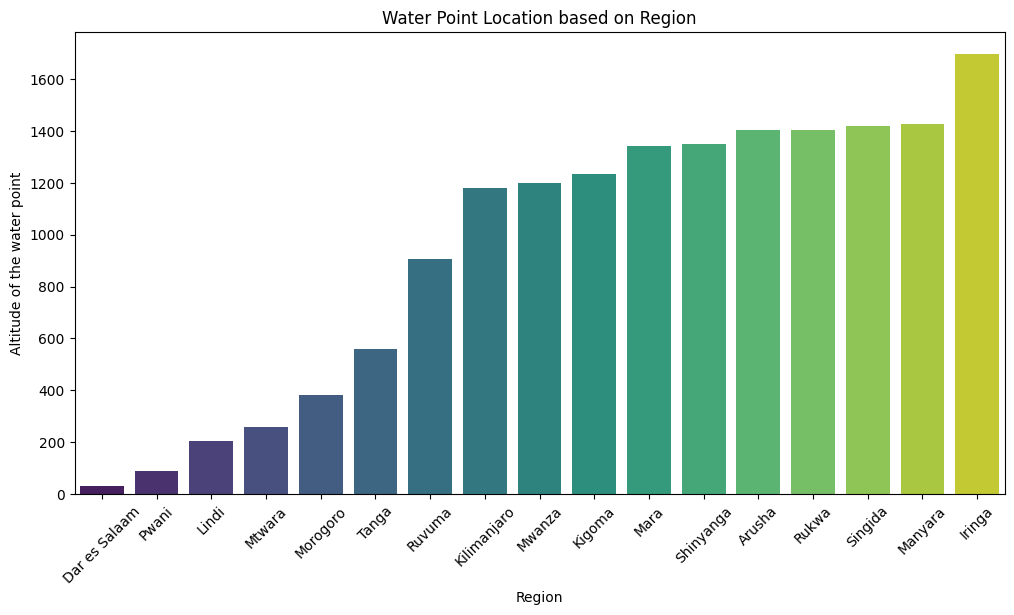

In [29]:

# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby('region')["gps_height"].mean().sort_values(ascending=True)

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='gps_height', data=sorted_data_df, palette='viridis')
plt.title('Water Point Location based on Region')
plt.xlabel('Region')
plt.ylabel('Altitude of the water point')
plt.xticks(rotation=45)
plt.show()

In [30]:
sorted_data = aged_data.groupby('region')["gps_height"].mean().sort_values(ascending=True)
sorted_data

region
Dar es Salaam      30.521574
Pwani              88.518322
Lindi             205.117934
Mtwara            257.893423
Morogoro          379.949599
Tanga             557.546716
Ruvuma            905.052591
Kilimanjaro      1180.440838
Mwanza           1200.631884
Kigoma           1234.992160
Mara             1341.749359
Shinyanga        1350.981707
Arusha           1402.827827
Rukwa            1404.642659
Singida          1416.921823
Manyara          1426.069427
Iringa           1696.031904
Name: gps_height, dtype: float64

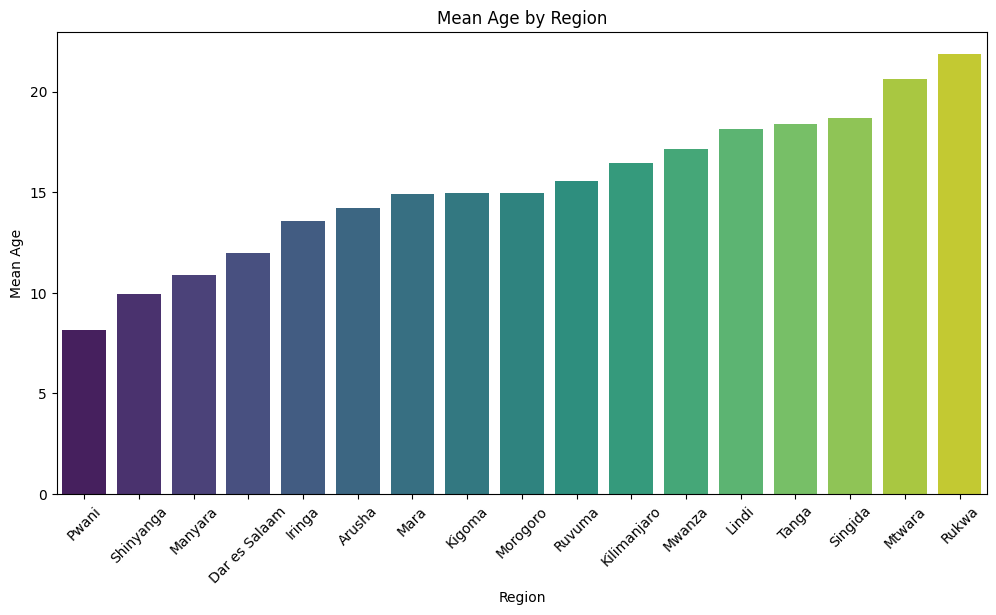

In [64]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby('region')["age"].mean().sort_values(ascending=True)

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='age', data=sorted_data_df, palette='viridis')
plt.title('Mean Age of Pumps by Region')
plt.xlabel('Region')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.show()


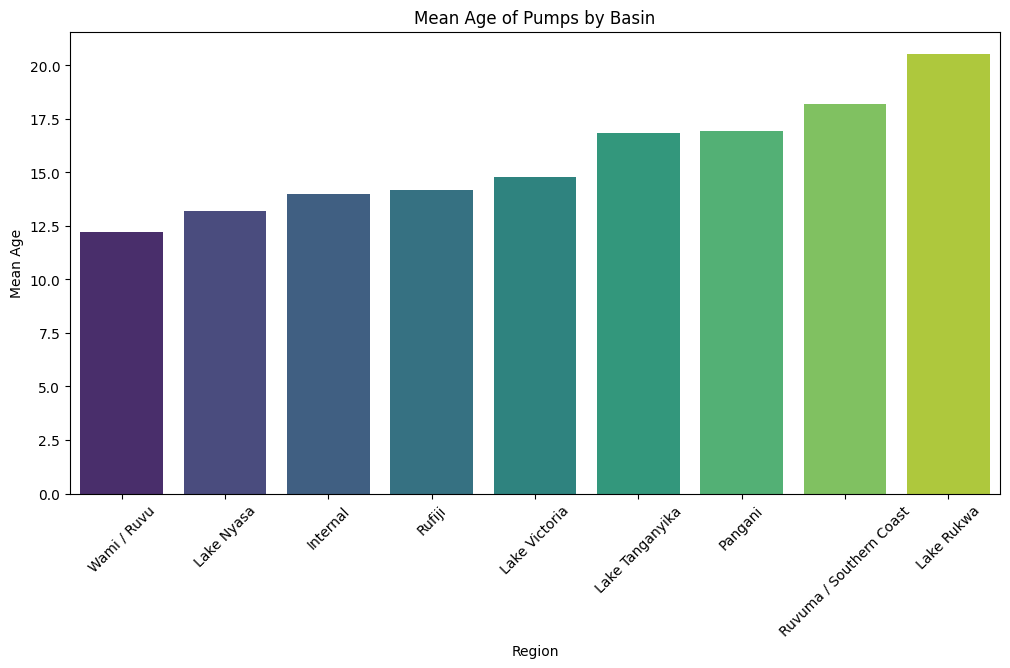

In [68]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby('basin')["age"].mean().sort_values(ascending=True)

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='basin', y='age', data=sorted_data_df, palette='viridis')
plt.title('Mean Age of Pumps by Basin')
plt.xlabel('Region')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.show()


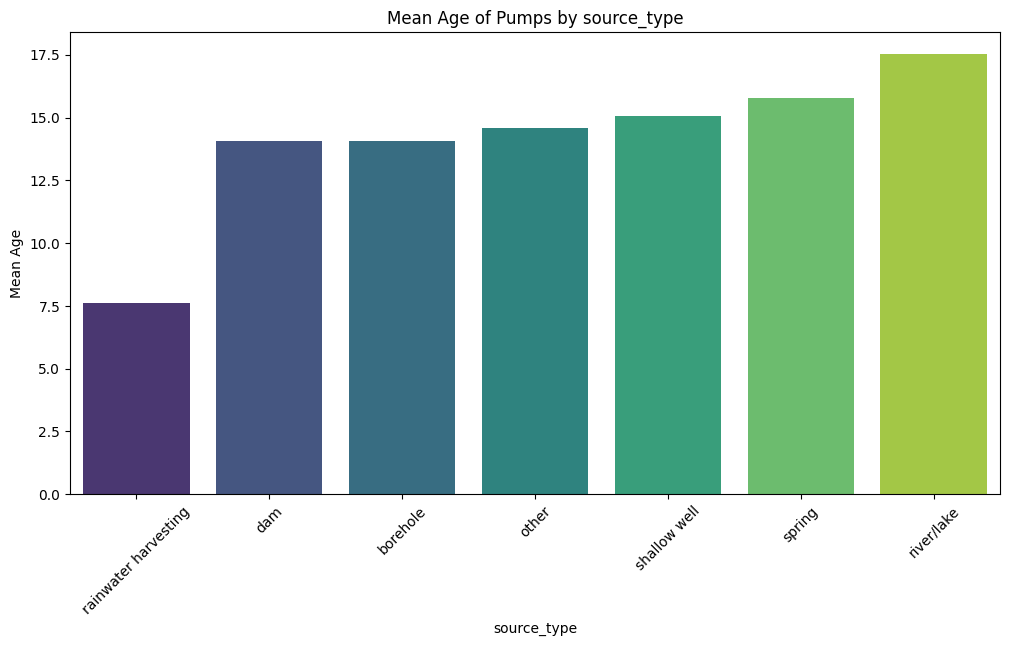

In [77]:
# Group by 'region', calculate the mean 'age', and sort in descending order
sorted_data = aged_data.groupby('source_type')["age"].mean().sort_values(ascending=True)

# Convert the Series to a DataFrame
sorted_data_df = sorted_data.reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='source_type', y='age', data=sorted_data_df, palette='viridis')
plt.title('Mean Age of Pumps by source_type')
plt.xlabel('source_type')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.show()


***
### HANDLING HIGH CARDINALITY COLUMNS
***

In [139]:
def high_cardinality_columns(df, threshold=8):
    """
    Display columns with high cardinality based on the threshold.
    """
    high_card_cols = [col for col in df.columns if df[col].nunique() > threshold]
    
    return print(f"Columns with high cardinality (threshold={threshold}): {high_card_cols}")
high_cardinality_columns(aged_data)

Columns with high cardinality (threshold=8): ['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'population', 'scheme_management', 'construction_year', 'age']


In [140]:
# Specific columns choosen to be dropped due to high cardinality
cols=['funder', 'installer', 'longitude', 'latitude', 
      'wpt_name', 'subvillage', 'lga', 'ward','scheme_management',
      'construction_year', 'date_recorded', 'basin',]
aged_data.drop(columns=cols, inplace= True)
aged_data.shape

(38672, 16)

In [141]:
aged_data.status_group.value_counts()

functional        24225
non functional    14447
Name: status_group, dtype: int64

**Observations:**
***
> - Specific columns with high cardinality were removed as this would cause overfitting in the model  
> - The dataset has 38,672 rows and 15 rows that shall be used for modelling.

***
## MODELING 
***
The following steps were carried out:
> - Data Preprocessing
> - Modeling using 
                    - Logistic Regression Classifier
                    - Naive Bayes Classifier
                    - Deceision Tree Classifier
                    - Random Forest Regression Classifier
                    - XGBOOST Classifier
> - HyperParameter Tuning

***
**DATA PREPROCESSING**
***
A function was creatd to undertake the following steps for data preprocessing:
> - Splitting data
> - Onehot encoding the features data
> - Label encoding the target data
> - Class Imbalance Correction

In [142]:
def preprocessing(df, test_size=0.25):
    """
    Performs Preprocessing of the data received
    """
    # Splitting the dataset into train and validation sets
    X = df.drop(columns=["status_group"], axis=1)
    y = df["status_group"]

    # Performing train test splits
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    # Extract categorical columns
    X_train_cat = X_train.select_dtypes(exclude='number')
    X_val_cat = X_val.select_dtypes(exclude='number')

    # One-hot encode categorical features
    X_train_ohe = pd.get_dummies(X_train_cat, drop_first=True)
    X_val_ohe = pd.get_dummies(X_val_cat, drop_first=True)

    # Align columns of validation set with training set
    X_val_ohe = X_val_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

    # Instantiate the Label Encoder class
    label_encoder = LabelEncoder()

    # Fit and transform the data
    y_train_lb = label_encoder.fit_transform(y_train)
    y_val_lb = label_encoder.transform(y_val)

    # Return array back into a dataframe
    y_train_enc = pd.Series(y_train_lb, index=y_train.index, name='status_group')
    y_val_enc = pd.Series(y_val_lb, index=y_val.index, name='status_group')

    # Instantiate the SMOTE class
    smote = SMOTE(k_neighbors=15, random_state=42)

    # Fit and resample the data
    X_train_sc, y_train_sc = smote.fit_resample(X_train_ohe, y_train_enc)
    
    return X_train_sc, X_val_ohe, y_train_sc, y_val_enc

***
**MODELING**
***
A function was created that would undertake classifciation using different models.

In [143]:
def modeling(X_train_enc, X_val_enc, y_train_enc, y_val_enc, classifiers):
    # Define empty lists to store results in a table
    table = []
    """
    Inputs different classifiers and return a table with the results for train and validation sets
    """
    # Iterate over classifiers
    for clf_name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train_enc, y_train_enc)

        # Make predictions
        y_pred_val = clf.predict(X_val_enc)
        y_pred_train = clf.predict(X_train_enc)

        # Calculate accuracy and F1 score for training set
        train_accuracy = accuracy_score(y_train_enc, y_pred_train)
        train_f1 = f1_score(y_train_enc, y_pred_train)
        train_cross_val = cross_val_score(clf, X_train_enc, y_train_enc, cv=5).mean()

        # Calculate accuracy and F1 score for validation set
        val_accuracy = accuracy_score(y_val_enc, y_pred_val)
        val_f1 = f1_score(y_val_enc, y_pred_val)
        val_cross_val = cross_val_score(clf, X_val_enc, y_val_enc, cv=5).mean()

        # Append results to the list
        table.append({
            'Classifier': clf_name,
            'Data': 'Training',
            'Accuracy': train_accuracy,
            'F1 Score': train_f1,
            'Cross Val Score': train_cross_val
        })
        table.append({
            'Classifier': clf_name,
            'Data': 'Validation',
            'Accuracy': val_accuracy,
            'F1 Score': val_f1,
            'Cross Val Score': val_cross_val
        })

    # Create DataFrame from results
    model_df = pd.DataFrame(table)
    
    return model_df

> Prior to modeling, we looked at the best size we should use for the project as below

In [144]:
def get_test_sizes(df, test_sizes, classifiers):
    results = []
    """
    Determine ideal test_size from a list using logistic regression
    """
    for test_size in test_sizes:
        X_train_enc, X_val_enc, y_train_enc, y_val_enc = preprocessing(df, test_size=test_size)
        model_df = modeling(X_train_enc, X_val_enc, y_train_enc, y_val_enc, classifiers)
        model_df['Test Size'] = test_size
        results.append(model_df)

    final_results = pd.concat(results).reset_index(drop=True)
    return final_results



In [145]:
# List of test sizes to test
test_sizes =  np.arange(0.15, 0.50, 0.05)

# Classifier used for the test
classifiers = {'Logistic Regression': LogisticRegression(random_state=42)}

# table to visualize the results
final_results = get_test_sizes(aged_data, test_sizes, classifiers)
final_results

Classifier        Data  Accuracy  F1 Score  Cross Val Score  \
0   Logistic Regression    Training  0.758529  0.740698         0.755840   
1   Logistic Regression  Validation  0.768833  0.687340         0.775383   
2   Logistic Regression    Training  0.758477  0.739626         0.755385   
3   Logistic Regression  Validation  0.769101  0.683109         0.776212   
4   Logistic Regression    Training  0.757035  0.738665         0.754183   
5   Logistic Regression  Validation  0.769859  0.686310         0.774617   
6   Logistic Regression    Training  0.758800  0.740181         0.755339   
7   Logistic Regression  Validation  0.766764  0.683138         0.775125   
8   Logistic Regression    Training  0.760436  0.742123         0.757278   
9   Logistic Regression  Validation  0.766327  0.681374         0.776005   
10  Logistic Regression    Training  0.756930  0.736799         0.753337   
11  Logistic Regression  Validation  0.770056  0.684579         0.778461   
12  Logistic Regression    Training  0.760939  0.742016         0.756057   
13  Logistic Regression  Validation  0.769293  0.682533         0.780096   

    Test Size  
0        0.15  
1        0.15  
2        0.20  
3        0.20  
4        0.25  
5        0.25  
6        0.30  
7        0.30  
8        0.35  
9        0.35  
10       0.40  
11       0.40  
12       0.45  
13       0.45

**Observation**
***
While using logistic regression with its default hyper parameters we can see that a test size of 0.25 gives us the most ideal accuracy and f1 scores on the vaidation data. With and accuract of 76.98% and a f1 score of 68.63%. This is our bases for using the test size of 0.25 moving forward


***
The following models below were fitted with the test size=0.25

In [ ]:
# Setting the varibales
X_train_enc, X_val_enc, y_train_enc,y_val_enc= preprocessing(aged_data, test_size=0.25)

# Define classifiers to build
classifiers = {
                'Multinomial NB':        MultinomialNB(alpha=1.0),
                'Logistic Regression':   LogisticRegression(random_state=42, multi_class='auto'), 
                'KNN':                   KNeighborsClassifier(),
                'Decision Tree':         DecisionTreeClassifier(random_state=42),
               }
# Modeling
modeling(X_train_enc, X_val_enc, y_train_enc, y_val_enc, classifiers)


***
**Observation:**
***
All model were evaluated on their default hyper parameters. 
> The poorest performing Model was the Naive Bayes model with the lowest Accuracy and F1 scores for the validation values
> With the best performing model being the decision tree  for the validation values
> None of the model achieved an f1 score above 80% and so we shall try modeling using ensemble methods

In [ ]:

# Define classifiers to build
classifiers = {
                'Gradient Boosting': GradientBoostingClassifier(random_state=42),
                'Random Forest':     RandomForestClassifier(random_state=42),
                'XGBoost':           XGBClassifier()
               }

# Modeling
modeling(X_train_enc, X_val_enc, y_train_enc, y_val_enc, classifiers)



**Observation:**
***
> Gradient boosting performed worse than other non ensemble classifier methods
> 
> XGBoost provided the best scores across the board with little variance between train and validation scores.
>
> It was hence choosen for further hyper parameter tuning to try and increase its performance

***
**HYPERPARAMETER TUNING**
***
To perform some hyper parameter tuning,  GridsearchCV was considered but due to the large size of the dataset and the complexity of XGBoost, it was decided to use RandomizedSearchCV for parameter tuning

In [ ]:
# import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 500],
#     'max_depth': [7,8,9],
#     'learning_rate': [ 0.05, 0.1,0.2],
#     'colsample_bytree': [0.3, 0.7,1.0]
}

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=100, scoring=make_scorer(accuracy), cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_enc, y_train_enc)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate on the test set
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_val_enc)
f1_test = f1_score(y_val_enc, y_test_pred)
accuracy=accuracy_score(y_val_enc, y_test_pred)
print(f"F1 Score on Test Data: {f1_test}")
print(f"Accuracy on Test Data: {accuracy}")


In [ ]:
import pandas as pd

# Assuming rf.feature_importances_ contains the feature importances
feature_importances = best_model.feature_importances_

# Assuming X_train.columns contains the feature labels
feature_labels = X_train_enc.columns

# Create a DataFrame to store feature importances with their corresponding labels
feature_importance_df = pd.DataFrame({'Feature': feature_labels, 'Importance': feature_importances})

# Optionally, you can sort the DataFrame by importance to visualize the most important features first
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
feature_importance_df


In [ ]:
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'learning_rate': uniform(0.01, 0.3),
#     'max_depth': randint(3, 10),
#     'min_child_weight': randint(1, 6),
#     'gamma': uniform(0, 0.5),
#     'subsample': uniform(0.7, 0.3),
#     'colsample_bytree': uniform(0.7, 0.3),
#     'reg_alpha': uniform(0, 1),
#     'reg_lambda': uniform(1, 2)
# }

In [49]:
# from sklearn.ensemble import RandomForestClassifier
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [0,50,100],   # Number of trees in the forest
# #     'max_depth': [None, 10, 20],        # Maximum depth of the trees
# #     'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
# #     'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
# }

# # Create a Random Forest Classifier instance
# rf_clf = RandomForestClassifier(random_state=42)

# # Instantiate GridSearchCV with the Random Forest classifier and parameter grid
# grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train_enc, y_train_enc)

# # Print the best parameters found
# print("Best Parameters:", grid_search.best_params_)
    
# # Print the best score found
# print("Best Score:", grid_search.best_score_)


Best Parameters: {'n_estimators': 100}
Best Score: 0.8359891703196926


***
** FINDINGS AND RESULTS**
***
1. 

***
### CONCLUSIONS
***

***
### RECOMMENDATIONS
***
- Pumps seem to have a lifespan of 20 years with the mean of them failing by then
- Funder and Installer performance
- Data might be out of data


1. Logistic Regression
Description: A basic yet powerful linear model for binary or multi-class classification.
Advantages: Simple, interpretable, and efficient for large datasets.
Disadvantages: May not capture complex relationships in the data.
2. Decision Trees
Description: A non-linear model that splits the data into subsets based on feature values.
Advantages: Easy to interpret and visualize; can capture non-linear relationships.
Disadvantages: Prone to overfitting, especially with complex trees.
3. Random Forest
Description: An ensemble method that builds multiple decision trees and combines their predictions.
Advantages: Robust to overfitting, handles missing values well, and captures non-linear relationships.
Disadvantages: Less interpretable than a single decision tree, can be computationally intensive.
4. Gradient Boosting Machines (GBM)
Description: An ensemble technique that builds trees sequentially, where each tree corrects errors from the previous one.
Popular Variants: XGBoost, LightGBM, and CatBoost.
Advantages: High predictive accuracy, can handle a variety of data types, and allows for extensive hyperparameter tuning.
Disadvantages: Requires careful tuning to prevent overfitting, longer training times.
5. Support Vector Machines (SVM)
Description: A model that finds the optimal hyperplane to separate different classes.
Advantages: Effective in high-dimensional spaces, robust to overfitting with proper regularization.
Disadvantages: Computationally intensive for large datasets, less interpretable.
6. Neural Networks
Description: A set of algorithms modeled after the human brain, capable of capturing complex patterns.
Advantages: Can model complex and non-linear relationships, highly flexible.
Disadvantages: Requires large amounts of data and computational resources, less interpretable.
7. k-Nearest Neighbors (k-NN)
Description: A non-parametric method that classifies a point based on the majority class of its neighbors.
Advantages: Simple to implement, no training phase.
Disadvantages: Computationally expensive during prediction, sensitive to the choice of k and distance metric.
8. Naive Bayes
Description: A probabilistic classifier based on Bayes' theorem, assuming independence between features.
Advantages: Simple, fast, and effective for certain types of data, especially text classification.
Disadvantages: Assumption of feature independence is often unrealistic.
9. Ensemble Methods
Description: Combine predictions from multiple models to improve overall performance.
Popular Techniques: Bagging (Bootstrap Aggregating), Boosting, Stacking.
Advantages: Often results in better performance and robustness than individual models.
Disadvantages: Can be complex to implement and interpret.
Recommended Approach
Data Exploration and Preprocessing:

Handle missing values, outliers, and categorical variables.
Feature engineering to create relevant predictors.
Baseline Model:

Start with a simple model like Logistic Regression or Decision Tree to establish a baseline performance.
Advanced Models:

Implement and compare more complex models such as Random Forest, Gradient Boosting Machines (e.g., XGBoost, LightGBM), and Neural Networks.
Hyperparameter Tuning:

Use techniques like Grid Search or Random Search with cross-validation to fine-tune model parameters.
Model Evaluation:

Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to evaluate model performance.
Perform stratified k-fold cross-validation to ensure robust performance estimates.
Model Interpretability:

Use tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret complex models.
Analyze feature importance to understand key drivers of pump status.
Ensemble Techniques:

Consider combining multiple models using ensemble methods like stacking or voting classifiers to improve performance.

Baseline Model:

python
Copy code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
print(classification_report(y_test, y_pred))
Advanced Model (e.g., Random Forest):

python
Copy code
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
Hyperparameter Tuning:

python
Copy code
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
By following this structured approach, you can effectively model and predict the operational status of water pumps, providing valuable insights for maintenance and resource allocation.

results
The  results  indicate that  water  points 
3managed by village  committees  had  a  much  higher  likelihood  of  failure  than those managed by  private operators or water authority. Factors that cannot be modified such as hydrogeological factors play a major role  in  determining  water  points failure during  the  first year  after  installation.    However, management type as well as the type of pump and technology matter considerably more in the short and medium term. These findings highlight the importance of utilizing information on the hydrological characteristics in the design, construction and maintenance of water points. On the other  hand, the technology of water points is a more important factor in explaining failure over time, controlling for other factors.  